## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:
#### For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
1. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
1. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
1. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
1. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
1. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
1. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
1. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
1. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
1. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
1. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
1. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
1. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
1. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
1. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
1. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
1. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
1. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
1. lat - Latitude (Â°): 37.456 to 37.645
1. lon - Longitude (Â°): 126.826 to 127.135
1. DEM - Elevation (m): 12.4 to 212.3
1. Slope - Slope (Â°): 0.1 to 5.2
1. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
1. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
1. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

#### You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [1]:
### Importing all required basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing dataset from below path
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Flip lobo\Project Evaluation\Second Phase\temperature.csv')

In [3]:
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

### Observations:
- Dataset includes 7752 rows and 25 columns. Out of 25 columns, 2 (Next_Tmax and Next_Tmin) are target variables.
- Can see NaN values (number of NaN will be find further).
- It seems all columns contains continuous data, except Date, can be object data (will reconfirm further).
- Considering both target variables (Next_Tmax and Next_Tmin) values as continuous data, hence we have to create two separate Regression models for each of this Regression Problems.
- We can also check further to crisp the column header titles (for better readability), if required.

### Action to be taken:
- Will collect more evidence on above observations, in order to afirm the result.

In [4]:
df.sample(15)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
791      17.0  31-07-2013          29.6          23.6    54.637138   
4018     19.0  05-08-2015          32.5          25.8    48.607231   
4037     13.0  06-08-2015          34.5          25.9    38.555027   
6989     15.0  31-07-2017          27.5          24.3    43.447544   
2876      2.0  22-08-2014          27.6          19.5    65.207642   
5672     23.0  09-08-2016          33.2          27.0    57.421665   
4748     24.0  03-07-2016          26.9          21.7    62.347118   
2587     13.0  10-08-2014          26.8          20.4    45.978519   
1629      5.0  03-07-2014          24.2          21.2    50.209633   
2843     19.0  20-08-2014          28.1          21.7    74.564201   
4668     19.0  30-06-2016          26.4          22.3    72.817657   
960      11.0  07-08-2013          32.9          24.6    54.466248   
1360     11.0  23-08-2013          29.1          23.6    30.829927   
5371     22.0  28-07-2016          31.2          25.6    59.750427   
6929      5.0  29-07-2017          29.2          24.8    65.993446   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
791     94.678726         31.052819         23.510427  4.015900  131.790939   
4018    82.396362         33.176203         25.951018  5.196163   50.495320   
4037    81.723412         36.433250         26.445789  5.535163   58.460287   
6989    82.080101         33.463879         24.653364  5.324346   20.514962   
2876    92.757637         27.347045         23.697588  5.411977   39.781037   
5672    85.396591         32.446658         26.849346  5.451759   89.635839   
4748    92.220146         25.608968         20.875740  9.997646   58.602806   
2587    93.108826         29.076402         19.045772  6.622100   43.405295   
1629    87.933899         29.590852         20.789546  5.629900  119.920096   
2843    94.813286         24.517407         21.587330  7.230389   43.196013   
4668    90.985336         26.748704         23.441656  7.884631   28.989353   
960     88.152397         33.981162         27.566092  8.814040   47.747882   
1360    90.548706         33.166381         23.799501  5.642066   63.255561   
5371    89.557098         32.207891         24.893650  7.055476   76.674496   
6929    88.696739         30.930551         23.771030  5.889043  101.068394   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
791   ...    0.000000    0.000000    0.000000  37.6181  127.099  53.4712   
4018  ...    0.000000    0.000000    0.000000  37.5776  126.938  75.0924   
4037  ...    0.000000    0.045511    0.517369  37.5776  127.083  59.8324   
6989  ...    0.000000    0.000000    0.000000  37.5507  126.937  30.0464   
2876  ...    0.001527    0.002517    0.000000  37.6046  127.032  44.7624   
5672  ...    0.000000    0.000000    0.000000  37.5372  126.891  15.5876   
4748  ...    0.035809    4.996449    5.365516  37.5237  126.909  17.2956   
2587  ...    0.000000    0.000000    0.000000  37.5776  127.083  59.8324   
1629  ...    0.000000    0.095342    0.002684  37.5507  127.135  35.0380   
2843  ...   10.091092    8.261855    0.678393  37.5776  126.938  75.0924   
4668  ...    1.071632    0.219820    8.075212  37.5776  126.938  75.0924   
960   ...    0.000000    0.000000    0.000000  37.5372  127.085  28.7000   
1360  ...    0.000000    0.000000    0.000000  37.5372  127.085  28.7000   
5371  ...    3.463091    0.036492    0.036396  37.5102  127.086  21.9668   
6929  ...    0.000000    0.000000    0.017096  37.5507  127.135  35.0380   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
791   0.6970      5428.502441       32.1       23.3  
4018  1.7678      5330.692383       33.9       24.0  
4037  2.6865      5255.987793       35.6       26.5  
6989  0.8552      5428.960938       33.4       23.8  
2876  0.5141      4767.529785       29.2       20.4  
5672  0.1554      5142.875977       35.2       26.3  
4748  0.2223      5825.25

### Observations:
- With .sample method it is showing random 15 rows after setting parameter as (15).
- It includes random 15 rows and 25 columns.
- Above output having no Null values (having 15 rows out of 7752), we have to do more analysis to check the number of NaN and pattern for the same. This will help us to understand which method can be applicable to deal the same.

In [5]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

### Observations:
- With .tail method it is showing last 5 rows(by default set parameter).
- It includes last 5 rows (out of 7752 rows) and 25 columns.
- Can see NaN value in above output

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

### Observations:
- Can see most of the columns (station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse	LDAPS_Tmin_lapse	LDAPS_WS	LDAPS_LH	LDAPS_CC1	LDAPS_CC2	LDAPS_CC3	LDAPS_CC4	LDAPS_PPT1	LDAPS_PPT2	LDAPS_PPT3	LDAPS_PPT4, Next_Tmax, and Next_Tmin) having NaN Values. However, the proportion of NaN values are different in different columns.
- Also, NaN values has been observed in both target variables as well. Will deal it further.

### Action to be taken:
- Checking percentage of NaN values in each column will give more insight and help to decide which is the best method to deal NaN values.
- Check the feasibility for updating column name for better readability.

In [7]:
## check percentage of null values in each column out of all 7752 rows
print((df.isnull().sum() / df.shape[0]).apply(lambda x: f"{x:.2%}"))

station             0.03%
Date                0.03%
Present_Tmax        0.90%
Present_Tmin        0.90%
LDAPS_RHmin         0.97%
LDAPS_RHmax         0.97%
LDAPS_Tmax_lapse    0.97%
LDAPS_Tmin_lapse    0.97%
LDAPS_WS            0.97%
LDAPS_LH            0.97%
LDAPS_CC1           0.97%
LDAPS_CC2           0.97%
LDAPS_CC3           0.97%
LDAPS_CC4           0.97%
LDAPS_PPT1          0.97%
LDAPS_PPT2          0.97%
LDAPS_PPT3          0.97%
LDAPS_PPT4          0.97%
lat                 0.00%
lon                 0.00%
DEM                 0.00%
Slope               0.00%
Solar radiation     0.00%
Next_Tmax           0.35%
Next_Tmin           0.35%
dtype: object


### Observations:
- NaN contribution in columns appears to be less than 1%, indicating minimal impact on the dataset.
- This suggests that handling NaN values might not significantly affect the overall dataset integrity.

### Conclusion:
- Dropping NaN:
   - Advantages:
     - Removes missing values without much impact on the dataset.
     - Saves time and potentially avoids biases that imputation could introduce.
   - Considerations:
     - Ensures integrity, especially for the target variable.
     - Minimal data loss might make it an efficient initial approach.
- Imputing NaN:
  - Advantages:
    - Useful when data loss is substantial or when more sophisticated imputation methods are applied.
  - Considerations:
    - Could distort variability and statistical properties if imputed values are inaccurate.
    - Careful selection of imputation methods required, as it can impact model bias.
     
### Action to be taken:
- Initiating with dropping NaN values due to minimal impact observed.
- Monitoring data loss and dataset integrity after dropping NaN values.
- Imputation might be explored further if the initial drop of NaNs results in significant data loss.

In [8]:
### Dealing NaN values with DropNa method.
df1 = df.dropna()
old_data = df.shape[0]
new_data = df1.shape[0]
print('Total data loss: ', ((old_data-new_data)/old_data)*100)

Total data loss:  2.1155830753353975


### Observations:
- A 2.11% data loss after dropping NaN values from the entire dataset seems to align with an acceptable range, considering it's relatively low. 

### Action to be taken:
- Our decision to assess the integrity of the dataset both statistically and graphically is a good approach. Here are steps you can take:
  -  Statistical Integrity Check:
     - Descriptive Statistics: Compute summary statistics (mean, median, standard deviation) before and after dropping NaNs. To ensure the essential statistical properties remain consistent.
     - Correlation Analysis: Reevaluate correlations between variables to ensure they maintain meaningful relationships post NaN removal.
  - Graphical Integrity Check:
     - Visualization: Will create visualizations (with histplot) comparing key variables before and after dropping NaNs. Verify if the distribution and relationships remain consistent.
- Will ensure the target variable (or variables critical to your analysis) maintains its distribution and characteristics post NaN removal.     

In [9]:
### Conducting a comparative analysis between the statistics of your dataset before and after implementing the dropna() method
print('Difference with stats method between old and new data (after implementing dropna) ')
print(df.describe()-df1.describe())

Difference with stats method between old and new data (after implementing dropna) 
          station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  162.000000     94.000000     94.000000    89.000000    89.000000   
mean    -0.014101      0.019846      0.029249     0.034403     0.013981   
std     -0.006290      0.002598      0.013081     0.041552    -0.007452   
min      0.000000      0.000000      0.000000     0.000000     0.000000   
25%      0.000000      0.000000      0.100000     0.003300     0.019138   
50%      0.000000      0.000000      0.000000     0.015825     0.009357   
75%      0.000000      0.000000      0.100000     0.074957     0.000904   
max      0.000000      0.000000      0.000000     0.000000     0.000000   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS   LDAPS_LH  LDAPS_CC1  \
count         89.000000         89.000000  89.000000  89.000000  89.000000   
mean          -0.006681          0.000803   0.003778   0.012413   0.000263   
std    

### Observations on Statistical Differences:
- Count Discrepancy: There are differences in the count for each column, which is expected after dropping NaN values.
- Acceptable Range: Most statistical parameters (mean, std, min, 25%, 50%, 75%) exhibit very minimal differences (less than 0.05) between the old and new data for most columns, including the target variables.
- Columns with Higher Differences: Some columns like DEM, Slope, Solar radiation show notable differences, potentially due to outliers or skewness.

### Action to be taken
- Correlation Analysis: To strengthen the decision on using dropna(), a correlation analysis will be conducted between the old and new datasets.
- Dealing with Variances: Further examination and potential treatment for columns showing higher differences (DEM, Slope, Solar radiation) will be considered, possibly addressing outliers or skewness.

In [10]:
### Checking the correlation differences between the old and new datasets, post dropna() implementation

print('Difference of corr method between old and new data (after implementing dropna) ')
print(df.corr()-df1.corr())

Difference of corr method between old and new data (after implementing dropna) 
                   station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           0.000000     -0.000089     -0.000863     0.000724   
Present_Tmax     -0.000089      0.000000      0.003552     0.002277   
Present_Tmin     -0.000863      0.003552      0.000000     0.002721   
LDAPS_RHmin       0.000724      0.002277      0.002721     0.000000   
LDAPS_RHmax       0.001340      0.002734      0.003242     0.000783   
LDAPS_Tmax_lapse -0.000295      0.001512      0.002214     0.004999   
LDAPS_Tmin_lapse  0.000145      0.000542      0.000860     0.004239   
LDAPS_WS         -0.000502      0.003076      0.003669     0.004939   
LDAPS_LH         -0.002097      0.002470      0.003448     0.001337   
LDAPS_CC1         0.000417      0.001470      0.001245     0.000986   
LDAPS_CC2        -0.000112      0.001160      0.001401     0.000669   
LDAPS_CC3         0.000859      0.000878      0.001881     0.001610 

### Observations from Correlation Differences:
- Marginal Variations: Differences in correlations between the old and new datasets are relatively insignificant.
- Consistency in Relationships: Most variables display consistency in their relationships even after handling missing values.

### Action to be taken:
- Graphical Integrity Check: Proceeding with a graphical assessment to validate the dataset's integrity after dropping NaN values. Graphical analysis can further reinforce the consistency observed in the correlations and statistical properties.

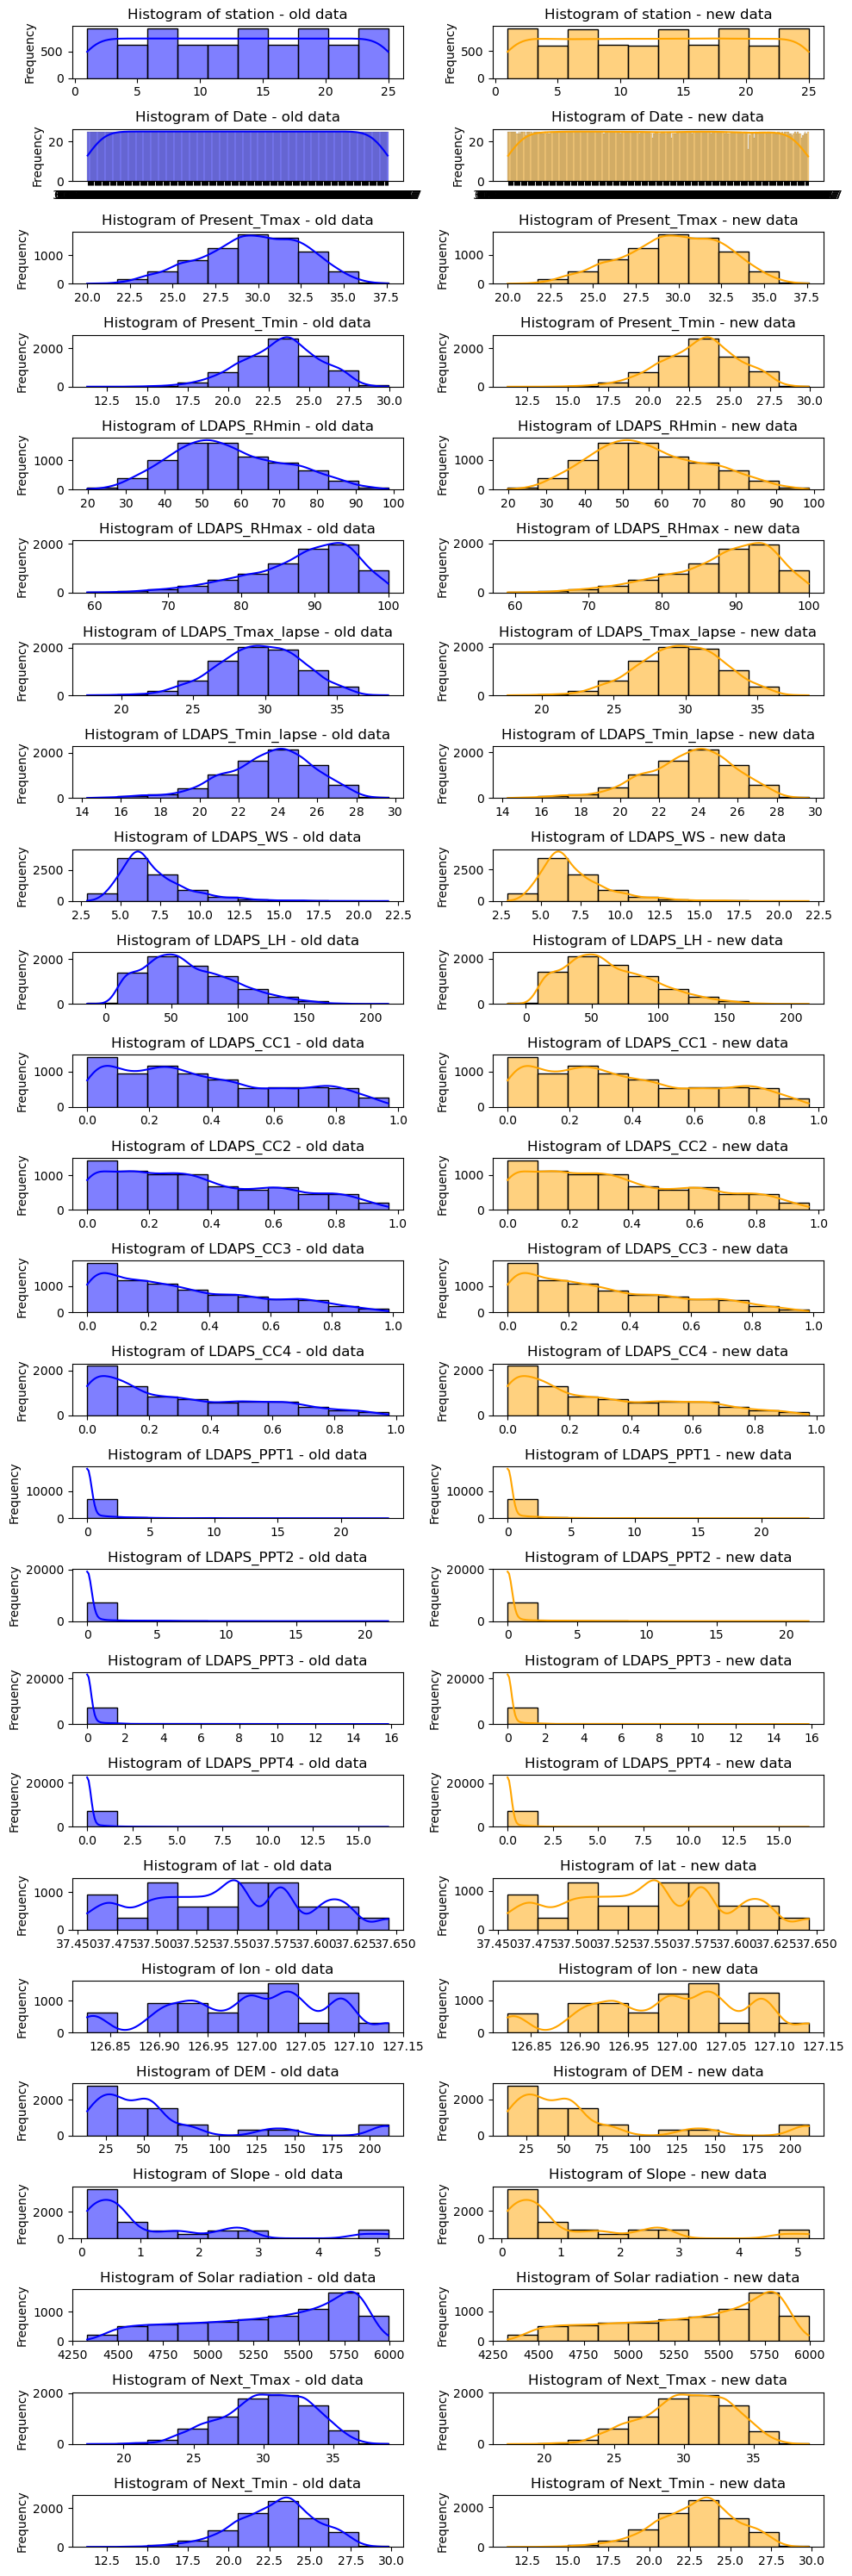

In [11]:
### Checking integrity between old and new data (after applying drop Na) with Histplot
plt.figure (figsize = (10,30))
plotnumber = 1
for i in df.columns:
    if plotnumber<=50:
        plt.subplot(25,2,plotnumber)
        sns.histplot(df[i], kde=True, color='blue', bins=10)
        plt.title(f'Histogram of {i} - old data')
        plt.xlabel('')
        plt.ylabel('Frequency')
        plt.subplot(25, 2, plotnumber+1)
        sns.histplot(df1[i], kde=True, color='orange', bins=10)
        plt.title(f'Histogram of {i} - new data')
        plt.xlabel('')
        plt.ylabel('Frequency')
    plotnumber+=2    
plt.tight_layout()
plt.show() 

### Observations:
- As per above results, no significant changes in the distribution of all the columns (including target variables).

### Conclusion:
- Basis all above observations and interpretation, which includes data loss in acceptable range, no change in integrity of the dataset (after applying drop Na method).
- Which concludes that we can proceed further analysis with new dataset.

In [12]:
df = df1.copy() ### copying new dataset into original dataset for further Preprocessing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


### Observations:
- With new dataset, can see datashape has been changed to 7588 (earlier was 7752) and 25 columns.
- No null values found in the dataset.
- All the columns are of float data type, except Date column as object data type.

### Action to be taken:
- Will convert Date column data type to Datetime format.
- Will check duplicate values (if any)
- Will check number of unique value in each column.

In [13]:
for i in df:
    print(df[i].value_counts())
    print('\n')

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64


30-06-2013    25
23-07-2016    25
22-08-2015    25
23-08-2015    25
24-08-2015    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64


31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


77.030350    2
51.810596    2
71.658089    2
58.255688    1
46.582764    1
        

### Observations from the Value Counts:
- Station: All stations seem to have an almost equal number of observations, indicating a balanced representation across stations.
- Dates seem evenly distributed, but there are different counts per date, which might suggest a time-series dataset.
- Present_Tmax and Present_Tmin: These columns show a range of temperatures with multiple occurrences for different values, indicating varied temperature recordings.
- LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse: These columns have diverse values, likely representing different atmospheric conditions.
- LDAPS_WS, LDAPS_LH, LDAPS_CC1-4, LDAPS_PPT1-4: Show varying numeric values, likely meteorological or climate-related data.
- Lat, Lon, DEM, Slope: Latitude, Longitude, Elevation, and Slope values vary across different ranges.
- Solar Radiation: A wide range of solar radiation values, possibly related to geographical locations or time of measurement.
- Next_Tmax and Next_Tmin (target variables): Next-day maximum and minimum temperatures have diverse values.

### Action to be taken:
- All above observations need to validate graphically.

In [14]:
## Chek duplicates
df2 = df.duplicated().sum()
df2

0

### Observations:
- No duplicate can be seen in dataset.

In [15]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

### Observations:
- List of dataset columns.

In [16]:
df.nunique().to_frame('Name of the columns')

Name of the columns
station                            25
Date                              307
Present_Tmax                      167
Present_Tmin                      155
LDAPS_RHmin                      7585
LDAPS_RHmax                      7577
LDAPS_Tmax_lapse                 7588
LDAPS_Tmin_lapse                 7588
LDAPS_WS                         7588
LDAPS_LH                         7588
LDAPS_CC1                        7485
LDAPS_CC2                        7496
LDAPS_CC3                        7512
LDAPS_CC4                        7438
LDAPS_PPT1                       2779
LDAPS_PPT2                       2479
LDAPS_PPT3                       2326
LDAPS_PPT4                       1892
lat                                12
lon                                25
DEM                                25
Slope                              25
Solar radiation                  1575
Next_Tmax                         181
Next_Tmin                         157

### Obseravtions:
- High Unique Values (>7000): Columns such as LDAPS_RHmin, LDAPS_RHmax, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 have a high number of unique values, indicating significant variability or granularity in the data. These might represent continuous or finely grained measurements.
- Equal Unique Values to Rows (7588): LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, and LDAPS_LH columns have the same number of unique values as the total number of rows (7588). This suggests that each value is distinct, possibly representing unique identifiers or measurements.

### Action plan:
- Dropness Applicability: For columns with unique values equal to the number of rows, assess if they act as identifiers or contain redundant information. If they don’t provide meaningful insights or are redundant, they might be candidates for dropping.
- Feature Importance: Investigate the significance of columns with high unique values (>7000) in relation to the target variable(s) for potential feature importance determination.- 

In [17]:
## Converting object data type of Date to correct data type as datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

### Observations:
- Can see Date format has been changed to datetime64[ns].

### Action to be taken:
- Will apply set_index to Date column, in order to make Date as index.
- However, this will set 'Date' as the index while preserving the 'station' column by reordering it to the first position in your DataFrame. This way, you maintain both the date index and the station information for your dataset.

In [18]:
## Will rearrange the index of dataset by uisng reindex() method.
columns = ['Date', 'station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'] 

df = df.reindex(columns=columns)
df

Date  station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0    2013-06-30      1.0          28.7          21.4    58.255688   
1    2013-06-30      2.0          31.9          21.6    52.263397   
2    2013-06-30      3.0          31.6          23.3    48.690479   
3    2013-06-30      4.0          32.0          23.4    58.239788   
4    2013-06-30      5.0          31.4          21.9    56.174095   
...         ...      ...           ...           ...          ...   
7745 2017-08-30     21.0          23.1          17.8    24.688997   
7746 2017-08-30     22.0          22.5          17.4    30.094858   
7747 2017-08-30     23.0          23.3          17.1    26.741310   
7748 2017-08-30     24.0          23.3          17.7    24.040634   
7749 2017-08-30     25.0          23.2          17.4    22.933014   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936  6.818887   69.451805   
1       90.604721         29.850689         24.035009  5.691890   51.937448   
2       83.973587         30.091292         24.565633  6.138224   20.573050   
3       96.483688         29.704629         23.326177  5.650050   65.727144   
4       90.155128         29.113934         23.486480  5.735004  107.965535   
...           ...               ...               ...       ...         ...   
7745    78.261383         27.812697         18.303014  6.603253    9.614074   
7746    83.690018         26.704905         17.814038  5.768083   82.146707   
7747    78.869858         26.352081         18.775678  6.148918   72.058294   
7748    77.294975         27.010193         18.733519  6.542819   47.241457   
7749    77.243744         27.939516         18.522965  7.289264    9.090034   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...         0.0         0.0         0.0  37.6046  126.991  212.3350   
1     ...         0.0         0.0         0.0  37.6046  127.032   44.7624   
2     ...         0.0         0.0         0.0  37.5776  127.058   33.3068   
3     ...         0.0         0.0         0.0  37.6450  127.022   45.7160   
4     ...         0.0         0.0         0.0  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7745  ...         0.0         0.0         0.0  37.5507  127.040   26.2980   
7746  ...         0.0         0.0         0.0  37.5102  127.086   21.9668   
7747  ...         0.0         0.0         0.0  37.5372  126.891   15.5876   
7748  ...         0.0         0.0         0.0  37.5237  126.909   17.2956   
7749  ...         0.0         0.0         0.0  37.5237  126.970   19.5844   

       Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.7850      5992.895996       29.1       21.2  
1     0.5141      5869.312500       30.5       22.5  
2     0.2661      5863.555664       31.1       23.9  
3     2.5348      5856.964844       31.7       24.3  
4     0.5055      5859.552246       31.2       22.5  
...      ...              ...        ...        ...  
7745  0.5721      4456.024414       27.6       17.7  
7746  0.1332      4441.803711       28.0       17.1  
7747  0.1554      4443.313965       28.3       18.1  
7748  0.2223      4438.373535       28.6       18.8  
7749  0.2713      4451.345215       27.8       17.4  

[7588 rows x 25 columns]

### Observations:
- Can see index position of Date column become [0] followed by other columns.

### Action to be taken:
- Will set Date column as index with set_index() method

In [19]:
df.set_index('Date', inplace=True)
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

### Observations:
- After applying set_index to Date column, we can see data shape has been changes to 7588 rows and 24 columns (earlier was 25).

In [20]:
df.shape

(7588, 24)

### Observations:
- Confirming the same that updated dataset includes 7588 rows and 24 columns

In [21]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

### Observations:
- No null values are observed across columns, maintaining a consistent count of 7588 for all columns.
- Certain columns (LDAPS_RHmin, LDAPS_RHmax, LDAPS_LH, lon, DEM, and Solar radiation) exhibit relatively high standard deviations, suggesting potential variability in these features.
- Specific columns (LDAPS_CC1, LDAPS_PPT2, LDAPS_PPT3, and LDAPS_PPT4) contain minimum values of 0, as observed previously.
- Summary statistics (mean, 25th percentile, median, 75th percentile) provide insight into the distribution of values within each column.
- Skewness is evident in some columns, warranting further examination.

### Action to be taken:
- Utilize the .replace method to improve column headers for better readability and conciseness.

In [22]:
df.columns = df.columns.str.replace('LDAPS_', '')
df

station  Present_Tmax  Present_Tmin      RHmin      RHmax  \
Date                                                                    
2013-06-30      1.0          28.7          21.4  58.255688  91.116364   
2013-06-30      2.0          31.9          21.6  52.263397  90.604721   
2013-06-30      3.0          31.6          23.3  48.690479  83.973587   
2013-06-30      4.0          32.0          23.4  58.239788  96.483688   
2013-06-30      5.0          31.4          21.9  56.174095  90.155128   
...             ...           ...           ...        ...        ...   
2017-08-30     21.0          23.1          17.8  24.688997  78.261383   
2017-08-30     22.0          22.5          17.4  30.094858  83.690018   
2017-08-30     23.0          23.3          17.1  26.741310  78.869858   
2017-08-30     24.0          23.3          17.7  24.040634  77.294975   
2017-08-30     25.0          23.2          17.4  22.933014  77.243744   

            Tmax_lapse  Tmin_lapse        WS          LH       CC1  ...  PPT2  \
Date                                                                ...         
2013-06-30   28.074101   23.006936  6.818887   69.451805  0.233947  ...   0.0   
2013-06-30   29.850689   24.035009  5.691890   51.937448  0.225508  ...   0.0   
2013-06-30   30.091292   24.565633  6.138224   20.573050  0.209344  ...   0.0   
2013-06-30   29.704629   23.326177  5.650050   65.727144  0.216372  ...   0.0   
2013-06-30   29.113934   23.486480  5.735004  107.965535  0.151407  ...   0.0   
...                ...         ...       ...         ...       ...  ...   ...   
2017-08-30   27.812697   18.303014  6.603253    9.614074  0.052902  ...   0.0   
2017-08-30   26.704905   17.814038  5.768083   82.146707  0.066461  ...   0.0   
2017-08-30   26.352081   18.775678  6.148918   72.058294  0.030034  ...   0.0   
2017-08-30   27.010193   18.733519  6.542819   47.241457  0.035874  ...   0.0   
2017-08-30   27.939516   18.522965  7.289264    9.090034  0.048954  ...   0.0   

            PPT3  PPT4      lat      lon       DEM   Slope  Solar radiation  \
Date                                                                          
2013-06-30   0.0   0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
2013-06-30   0.0   0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2013-06-30   0.0   0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
2013-06-30   0.0   0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
2013-06-30   0.0   0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...   ...      ...      ...       ...     ...              ...   
2017-08-30   0.0   0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
2017-08-30   0.0   0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
2017-08-30   0.0   0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
2017-08-30   0.0   0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
2017-08-30   0.0   0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

            Next_Tmax  Next_Tmin  
Date                              
2013-06-30       29.1       21.2  
2013-06-30       30.5       22.5  
2013-06-30       31.1       23.9  
2013-06-30       31.7       24.3  
2013-06-30       31.2       22.5  
...               ...        ...  
2017-08-30       27.6       17.7  
2017-08-30       28.0       17.1  
2017-08-30       28.3       18.1  
2017-08-30       28.6       18.8  
2017-08-30       27.8       17.4  

[7588 rows x 24 columns]

### Observations:
- Most of the columns prefix with LDAPS_, as LDAPS is the model operated by the Korea Meteorological Administration over Seoul, South Korea, which seems it will not impact our further analysis, hence same can be replaced as done above.
- Can see updated titles by removing LDAPS_.

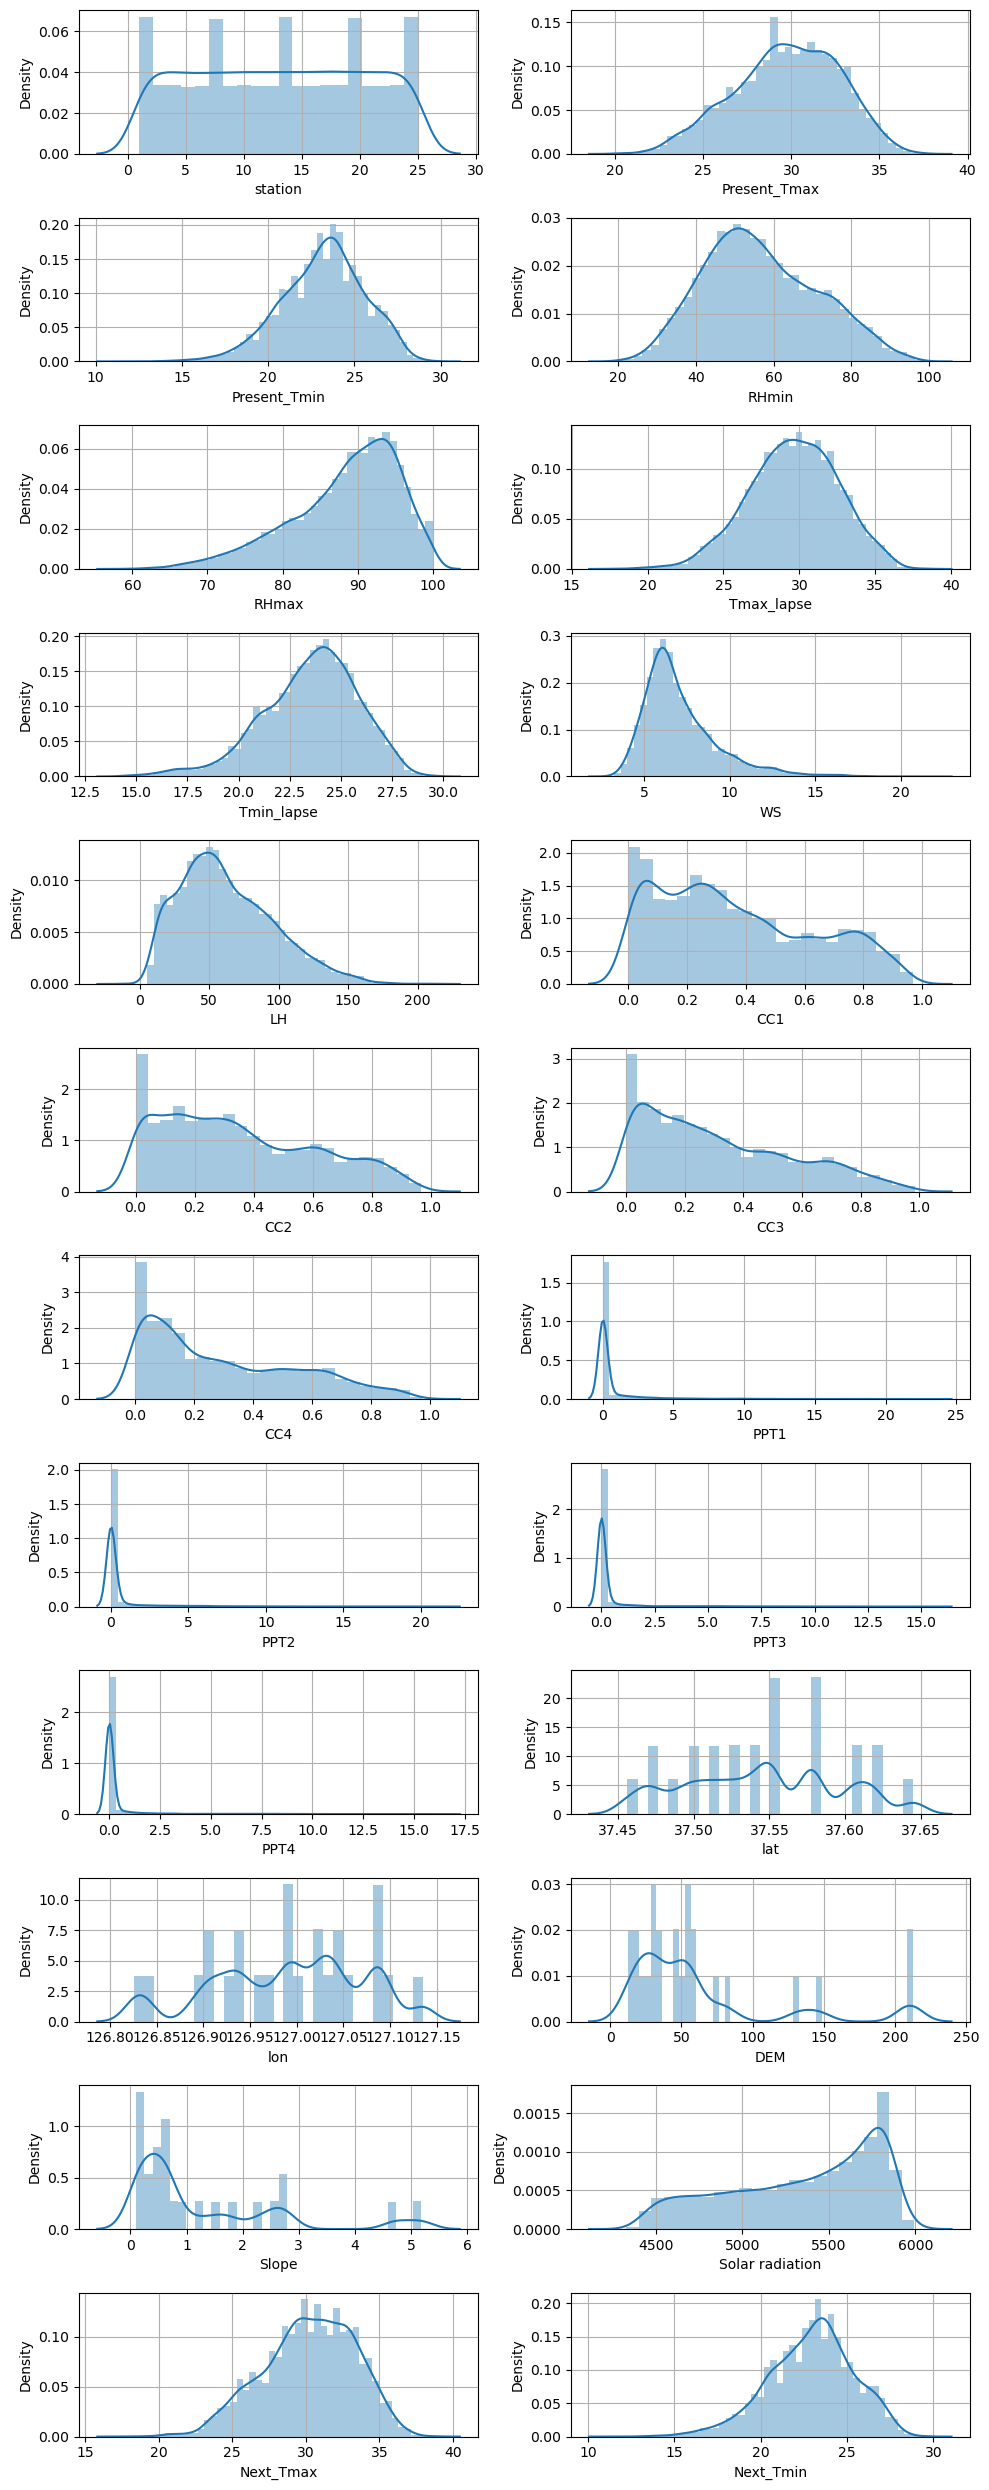

In [23]:
### Checking distribution of data for each columns:
plotnumber = 1
plt.figure(figsize = (10, 25))
for i in df:
    if plotnumber <=24:
        plt.subplot(12, 2, plotnumber)
        sns.distplot(df[i], kde = True)
        plt.xlabel(i, fontsize = 10)
        plt.grid(axis='both')               
    plotnumber+=1  
plt.tight_layout() 

### Observations:
- Can see following columns (RHmin, WS, LH, CC1, CC2, CC3, CC4, PPT1, PPT2, PPT3, PPT4, DEM, and Slope) have right-side skewness. Will reconfrm with skew method.
- Can see following columns (Present_Tmax, Present_Tmin, RHmax, Tmax_lapse, Tmin_lapse, Solar radiation, Next_Tmax, and Next_Tmin). However, out of which following columns (Next_Tmax, and Next_Tmin) are target variable.
- However, remaining columns seems to be almost normal distributed.

### Action to be taken:
- Will deal with skewness further.
- Will plot relationship graph with both the target variables separately.
- Will check and deal outlier's if required

In [24]:
df.skew()

station           -0.004178
Present_Tmax      -0.257069
Present_Tmin      -0.353822
RHmin              0.301396
RHmax             -0.845264
Tmax_lapse        -0.222349
Tmin_lapse        -0.574035
WS                 1.553926
LH                 0.662971
CC1                0.456716
CC2                0.473929
CC3                0.639649
CC4                0.663815
PPT1               5.305906
PPT2               5.710360
PPT3               6.356670
PPT4               6.681256
lat                0.085377
lon               -0.289048
DEM                1.721617
Slope              1.559050
Solar radiation   -0.524325
Next_Tmax         -0.334842
Next_Tmin         -0.393662
dtype: float64

### Observations:
- Right skewdness: WS, LH, CC3, CC4, PPT1, PPT2, PPT3, PPT4, DEM, and Slope.
- Left skewdness: RHmax, Tmin_lapse, Solar radiation, Next_Tmax (target variable 1), Next_Tmin (target variable 2).

### Action to be plan:
- Will deal with skewed columns.

In [25]:
### creating a list for skewed columns
skew = ['RHmax', 'Tmin_lapse', 'WS', 'LH', 'CC3', 'CC4', 'PPT1', 'PPT2', 'PPT3', 'PPT4', 'DEM', 'Slope', 'Solar radiation']
skew

['RHmax',
 'Tmin_lapse',
 'WS',
 'LH',
 'CC3',
 'CC4',
 'PPT1',
 'PPT2',
 'PPT3',
 'PPT4',
 'DEM',
 'Slope',
 'Solar radiation']

### Observations:
- List has been ready with skew columns, can be used in further process.

In [26]:
df_skew = df.copy() ### Creating new data to perform skewness by copying original dataset.

### Skewness will be deal with Powertransformation ('Yeo-Johnson'), due to having +ve and -ve values.
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df_skew[skew] = scaler.fit_transform(df_skew[skew]+0.5)
df_skew.skew()

station           -0.004178
Present_Tmax      -0.257069
Present_Tmin      -0.353822
RHmin              0.301396
RHmax             -0.119998
Tmax_lapse        -0.222349
Tmin_lapse        -0.021333
WS                 0.008526
LH                 0.028136
CC1                0.456716
CC2                0.473929
CC3                0.107311
CC4                0.147324
PPT1               1.498773
PPT2               1.692922
PPT3               1.873131
PPT4               2.091899
lat                0.085377
lon               -0.289048
DEM                0.041696
Slope              0.276148
Solar radiation   -0.182346
Next_Tmax         -0.334842
Next_Tmin         -0.393662
dtype: float64

### Observations:
- It's great to see that skewness has been significantly reduced in most columns.
- However, those columns (PPT1, PPT2, PPT3, PPT4) still exhibit right skewness, indicating their distributions aren't symmetrical.
- Hence, will continue our further journey with new dataset (after removing skewness).

### Action to be taken:
- Will check and remove outliers
- Will compare distribution of each column (before and after handling skewness and outliers), to afirm our result.

In [27]:
df_updated = df_skew.copy() ## Copying updated dataset into main dataset for further processing.
df_updated.skew()

station           -0.004178
Present_Tmax      -0.257069
Present_Tmin      -0.353822
RHmin              0.301396
RHmax             -0.119998
Tmax_lapse        -0.222349
Tmin_lapse        -0.021333
WS                 0.008526
LH                 0.028136
CC1                0.456716
CC2                0.473929
CC3                0.107311
CC4                0.147324
PPT1               1.498773
PPT2               1.692922
PPT3               1.873131
PPT4               2.091899
lat                0.085377
lon               -0.289048
DEM                0.041696
Slope              0.276148
Solar radiation   -0.182346
Next_Tmax         -0.334842
Next_Tmin         -0.393662
dtype: float64

### Observations:
- With skewness values, it seems copied to existing dataset has been successful.

### Action to be taken:
- Will check Outliers and deal the same.

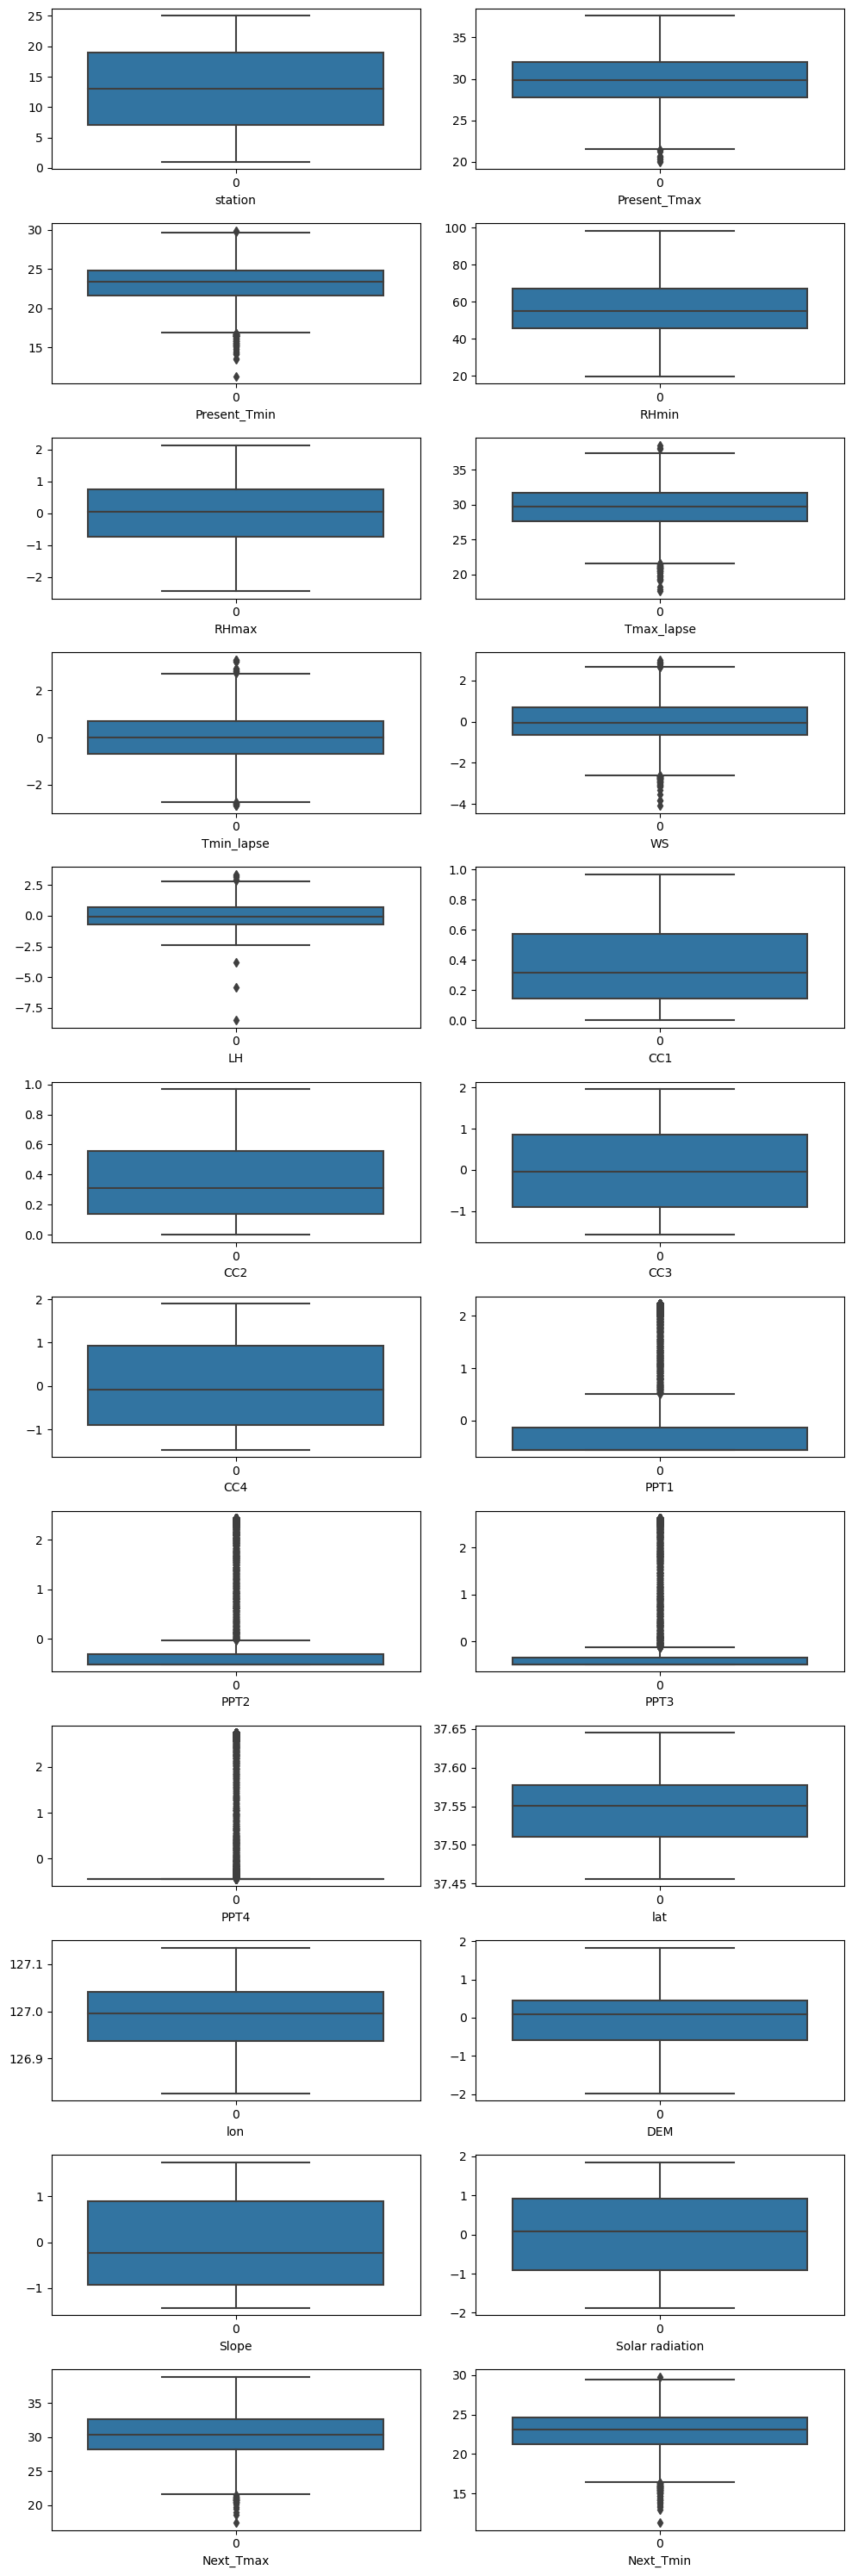

In [28]:
### Checking Outliers
plt.figure(figsize=(10, 30))
number = 1
for i in df_updated:
    if number <= 24:
        plt.subplot(12, 2, number)       
        sns.boxplot(data=df_updated[i], orient='v')
        plt.xlabel(i)
        number += 1
plt.tight_layout()

### Observations:
- Can see outliers in the following columns (Present_Tmax, Present_Tmin, Tmax_lapse, Tmin_lapse, WS, LH, PPT1, PPT2, PPT3, PPT4, Next_Tmax (target variable 1), and Next_Tmin (target variable 2).

### Action to be taken:
- Will deal with outliers.
- Again check the boxplot to afirm change in outliers.

In [29]:
## removing outliers with z score
from scipy.stats import zscore
z = np.abs(zscore(df_updated))
np.where(z>3)
df_new = df_updated[(z<3).all(axis=1)]
old_data = df_updated.shape[0]
new_data = df_new.shape[0]
loss_data = ((old_data - new_data) / old_data) * 100
print('Old data =', old_data)
print('New data = ', new_data)
print('Loss data in percentage = ', loss_data)
print('\n', df_new)

Old data = 7588
New data =  7483
Loss data in percentage =  1.3837638376383763

             station  Present_Tmax  Present_Tmin      RHmin     RHmax  \
Date                                                                   
2013-06-30      1.0          28.7          21.4  58.255688  0.271443   
2013-06-30      2.0          31.9          21.6  52.263397  0.184832   
2013-06-30      3.0          31.6          23.3  48.690479 -0.769138   
2013-06-30      4.0          32.0          23.4  58.239788  1.309793   
2013-06-30      5.0          31.4          21.9  56.174095  0.110376   
...             ...           ...           ...        ...       ...   
2017-08-30     21.0          23.1          17.8  24.688997 -1.375874   
2017-08-30     22.0          22.5          17.4  30.094858 -0.803551   
2017-08-30     23.0          23.3          17.1  26.741310 -1.319380   
2017-08-30     24.0          23.3          17.7  24.040634 -1.461950   
2017-08-30     25.0          23.2          17.4  22.933

### Observations:
- After removing outliers, our final dataset includes 7483 rows and 24 columns with data loss of 1.38%.

### Action to be taken:
- Will reconfirm by plotting box plot between before and after removing outliers.

- Checking the intensity of outliers between before and after removing outliers dataset.
- Considering high number of  columns (total 48 includes of both old and new dataset).
- Will divide each dataset into 12 columns each, so further hindrace would be facing.

In [30]:
df_updated.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3', 'CC4',
       'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [31]:
### Created from old dataset (before handling outliers)
df1_old = df_updated[['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3']]

df2_old = df_updated[['CC4', 'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']]

### Created from new dataset (after handling outliers)

df1_new = df_new[['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3']]

df2_new = df_new[['CC4', 'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']]

print('Shape of old dataset part 1: ', df1_old.shape)
print('\n Shape of old dataset part 2: ', df2_old.shape)
print('\n Shape of new dataset part 1: ', df1_new.shape)
print('\n Shape of new dataset part 2: ', df2_new.shape)

Shape of old dataset part 1:  (7588, 12)

 Shape of old dataset part 2:  (7588, 12)

 Shape of new dataset part 1:  (7483, 12)

 Shape of new dataset part 2:  (7483, 12)


### Observations:
- Above observations confirmed the separation of old and new dataset into each 12 columns.

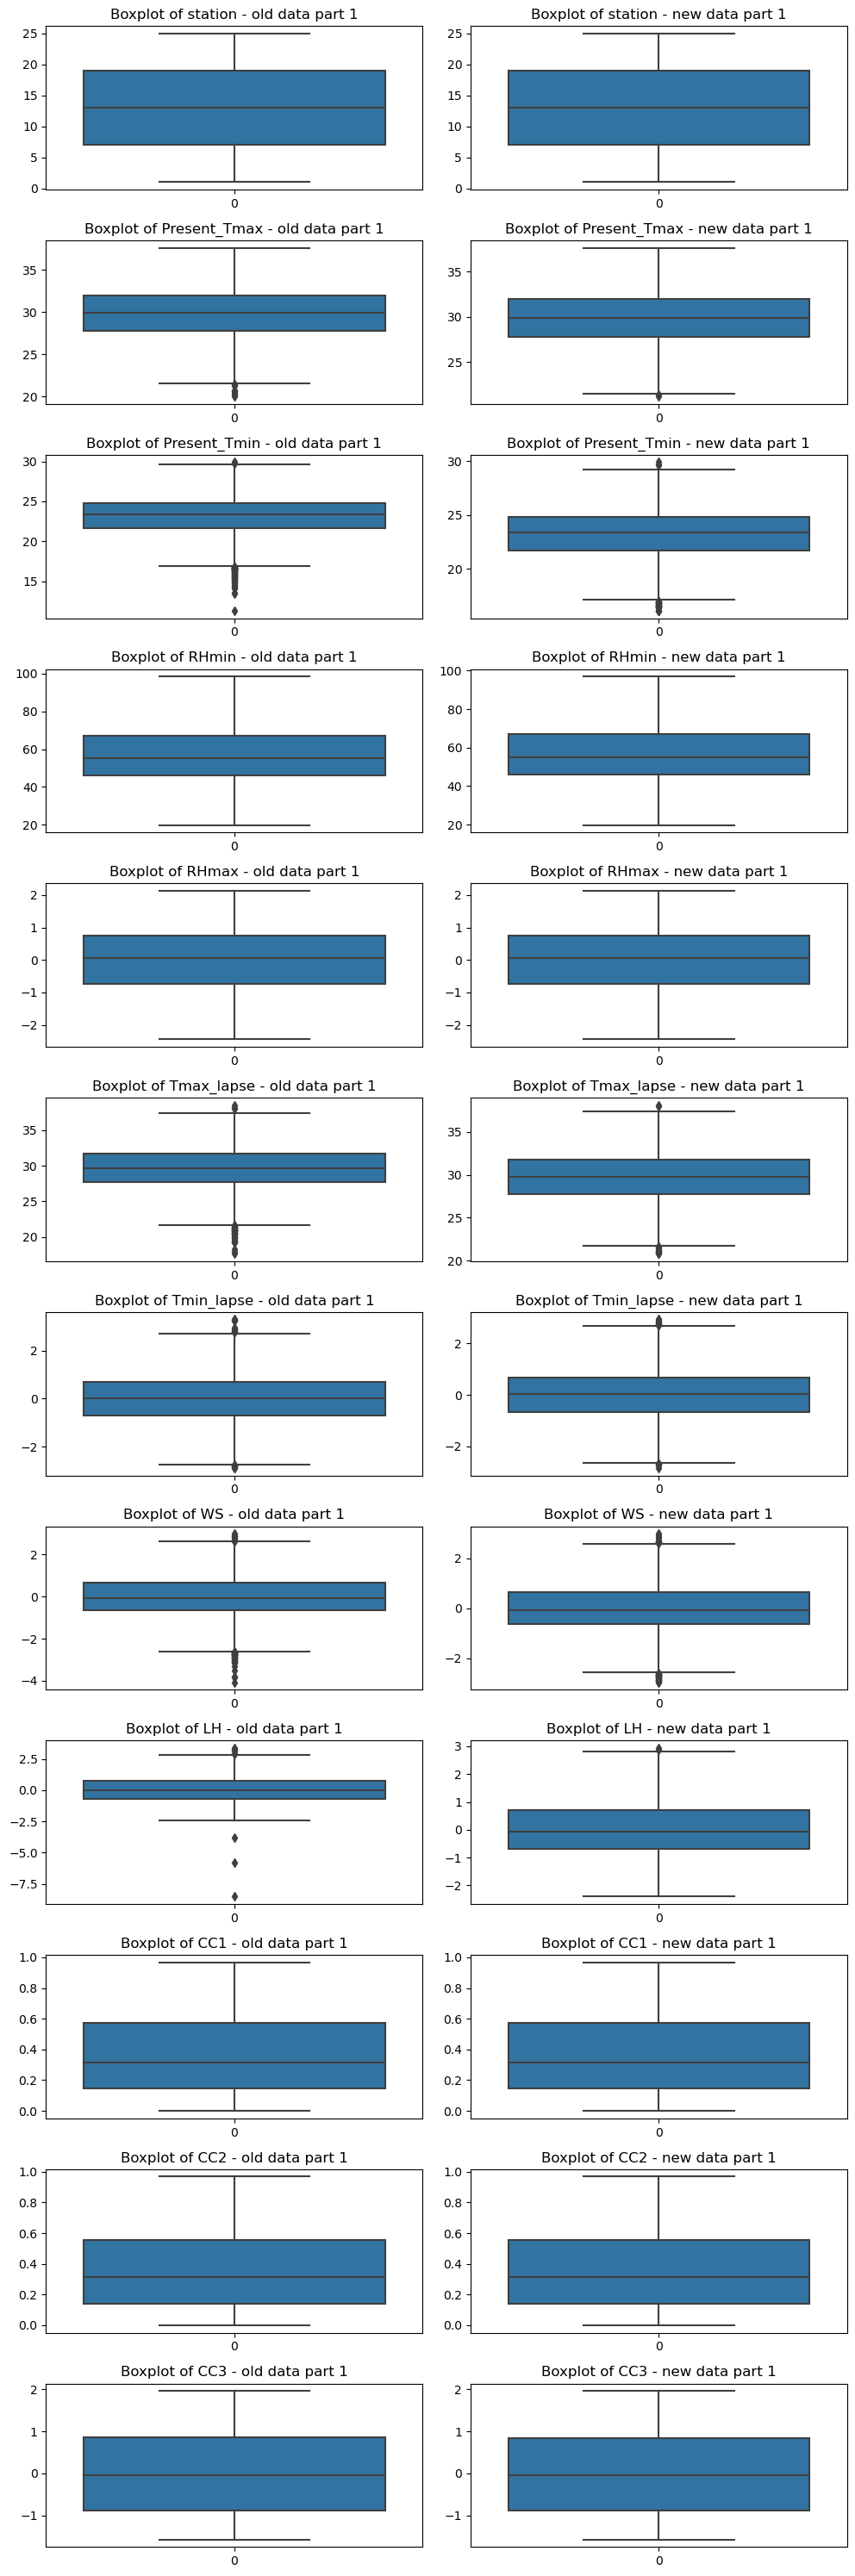

In [32]:
### Checking the intensity of outliers between before and after removing outliers in dataset part 1.
plt.figure (figsize = (10,30))
plotnumber = 1
for i in df1_old.columns:
    if plotnumber<=24:
        plt.subplot(12,2,plotnumber)
        sns.boxplot(data=df1_old[i], orient='v')
        plt.title(f'Boxplot of {i} - old data part 1')
        plt.subplot(12, 2, plotnumber+1)
        sns.boxplot(data=df1_new[i], orient ='v')
        plt.title(f'Boxplot of {i} - new data part 1')        
    plotnumber+=2    
plt.tight_layout()
plt.show() 

### Observations:
- Can easily see the reduce intensity of outliers in new dataset part 1 (after applying z-score to handle outliers). 
- This cofirmed Z-Score has been shown effectiveness by dealing outliers in dataset of part 1. Will check with dataset of part 2.

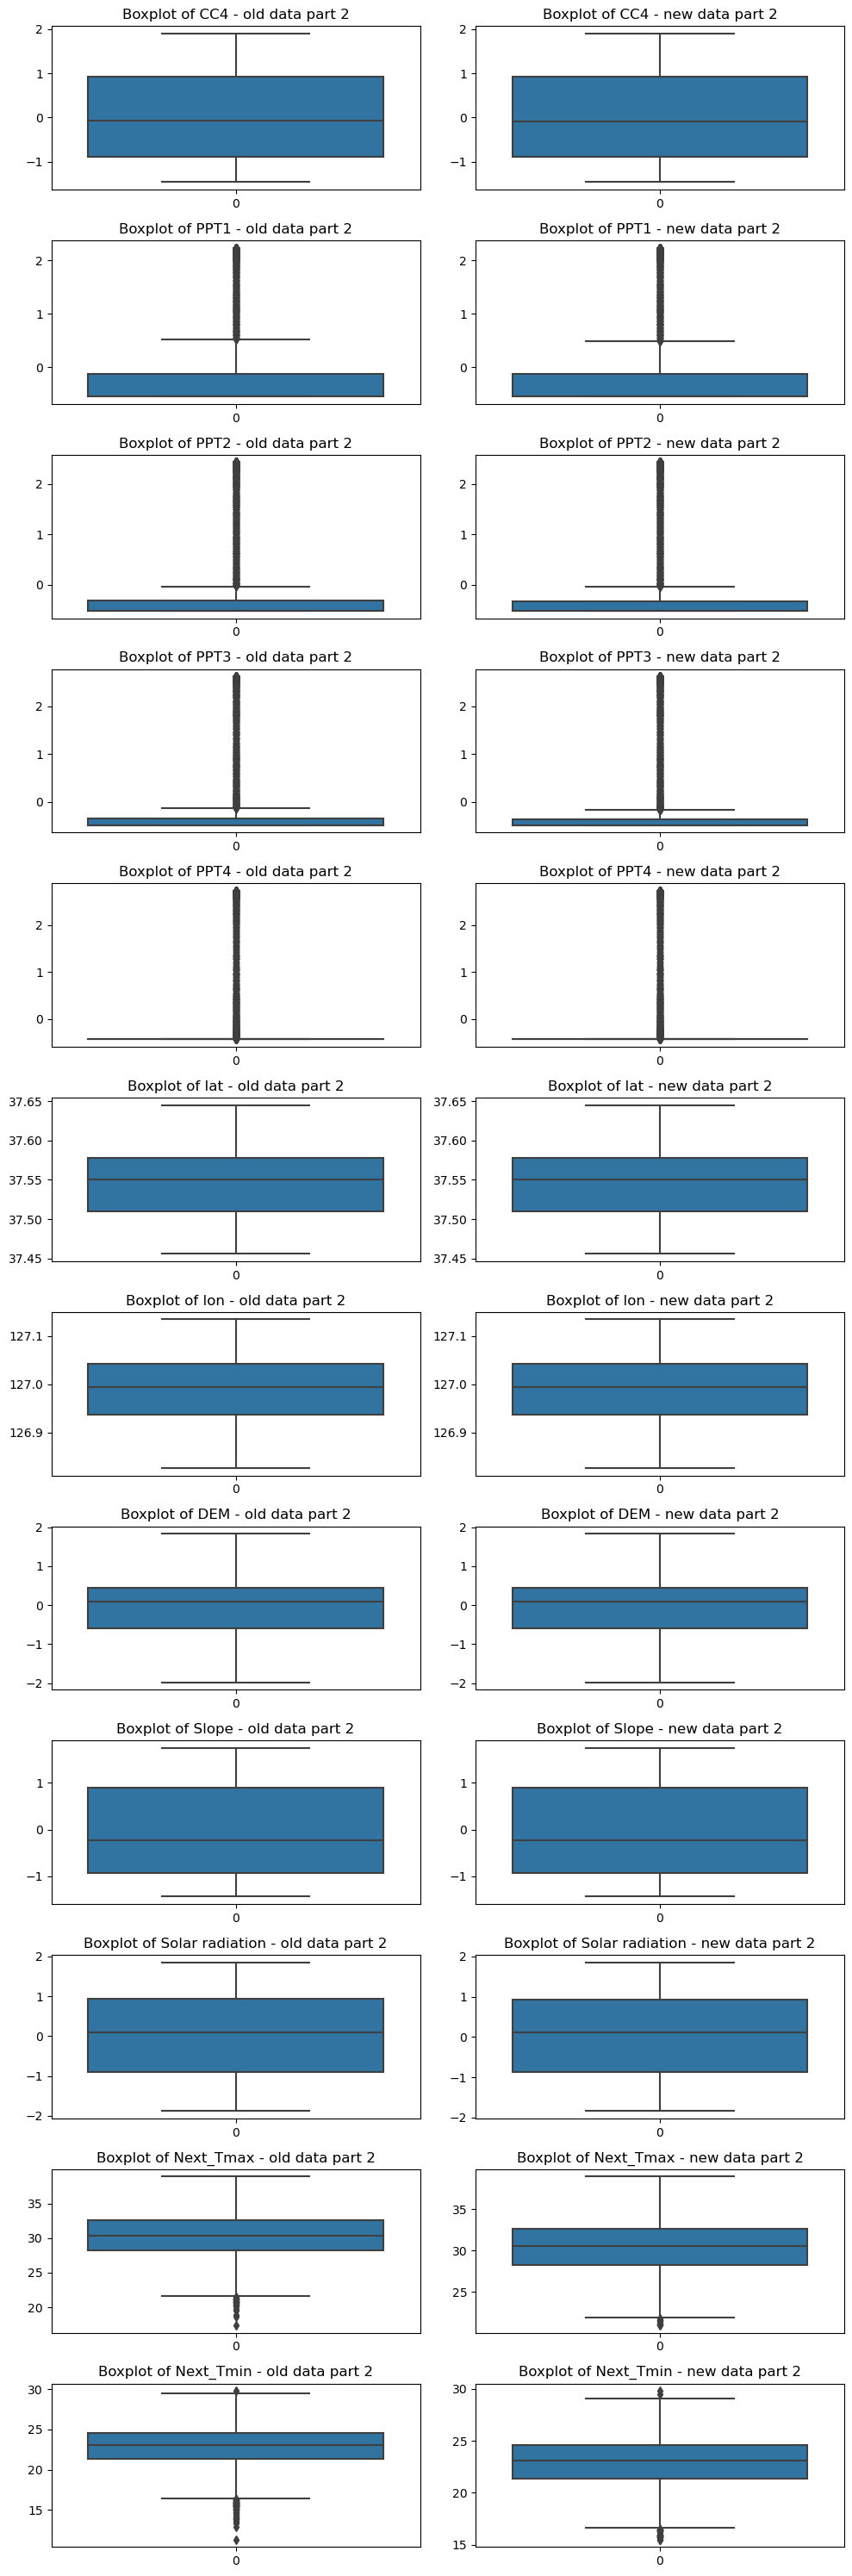

In [33]:
### Checking the intensity of outliers between before and after removing outliers in dataset part 2.
plt.figure (figsize = (10,30))
plotnumber = 1
for i in df2_old.columns:
    if plotnumber<=24:
        plt.subplot(12,2,plotnumber)
        sns.boxplot(data=df2_old[i], orient='v')
        plt.title(f'Boxplot of {i} - old data part 2')
        plt.subplot(12, 2, plotnumber+1)
        sns.boxplot(data=df2_new[i], orient ='v')
        plt.title(f'Boxplot of {i} - new data part 2')        
    plotnumber+=2    
plt.tight_layout()
plt.show() 

### Observations:
- Can easily see the reduce intensity of outliers in new dataset part 2 (after applying z-score to handle outliers).
- However, unable to see significant reduction in intensity of outliers in the following columns (PPT1, PPT2, PPT3, PPT4). 
- This may be due to high distribution of data, which is already documented in problem description as follows: 
   - PPT1 (values range 0 to 23.7, as given in problem description)
   - PPT2 (values range 0 to 21.6, as given in problem description)
   - PPT3 (values range 0 to 15.8, as given in problem description)
   - PPT4 (values range 0 to 16.7, as given in problem description)
- Hence, they have high right skewness.   
- Will check if this impact out feature engineering further and accordingly following columns can be dropped (if required).

### Action to be taken:
- Will check difference in distribution of data between old and new dataset (in parts, like done above for box plot).

In [34]:
### Created from old dataset (before handling skewness)
dfa_old = df[['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3']]

dfb_old = df[['CC4', 'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']]

### Created from new dataset (after handling skewness)

dfa_new = df_updated[['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3']]

dfb_new = df_updated[['CC4', 'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin']]

print('Shape of old dataset part 1: ', dfa_old.shape)
print('\n Shape of old dataset part 2: ', dfb_old.shape)
print('\n Shape of new dataset part 1: ', dfa_new.shape)
print('\n Shape of new dataset part 2: ', dfb_new.shape)

Shape of old dataset part 1:  (7588, 12)

 Shape of old dataset part 2:  (7588, 12)

 Shape of new dataset part 1:  (7588, 12)

 Shape of new dataset part 2:  (7588, 12)


### Observations:
- Above observations confirmed the separation of old and new dataset into each 12 columns.

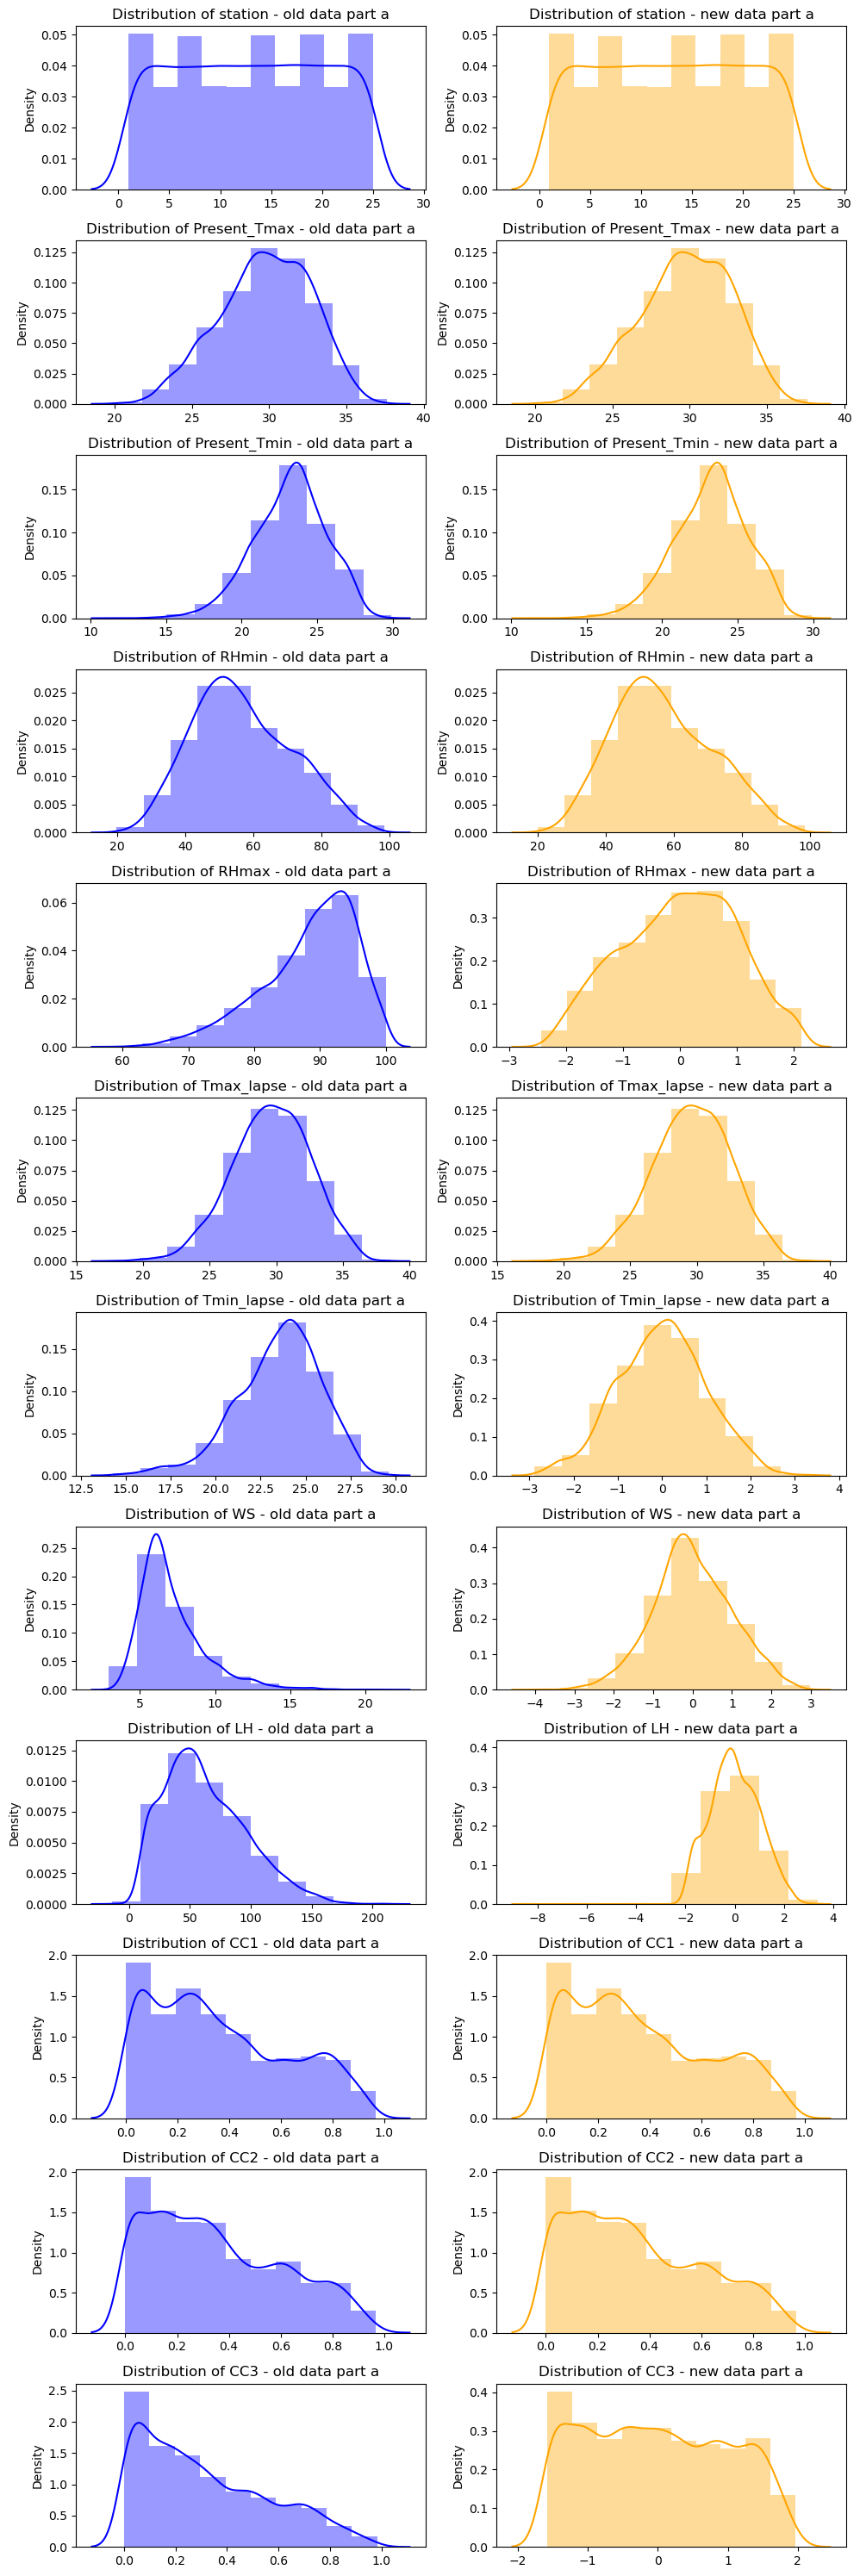

In [35]:
### Checking the distribution of data before and after handling skewness in dataset part a with distplot.
plt.figure (figsize = (10,30))
plotnumber = 1
for i in dfa_old.columns:
    if plotnumber<=24:
        plt.subplot(12,2,plotnumber)
        sns.distplot(dfa_old[i], kde=True, color='blue', bins=10)
        plt.title(f'Distribution of {i} - old data part a')
        plt.xlabel('')
        plt.ylabel('Density')
        plt.subplot(12, 2, plotnumber+1)
        sns.distplot(dfa_new[i], kde=True, color='orange', bins=10)
        plt.title(f'Distribution of {i} - new data part a')
        plt.xlabel('')
        plt.ylabel('Density')
    plotnumber+=2    
plt.tight_layout()
plt.show() 

### Observations:
- Before handling skewness, following columns of Part a ('RHmax', 'Tmin_lapse', 'WS', 'LH', 'CC3') had skewness.
- Basis above dist plot between old and new data, it can be easily see the changes in distribution of data, which leads to almost normal distribution (in new dataset).
- This confirms effectiveness of Power Transformer ('Yeo-Johnson') method into new dataset part a.

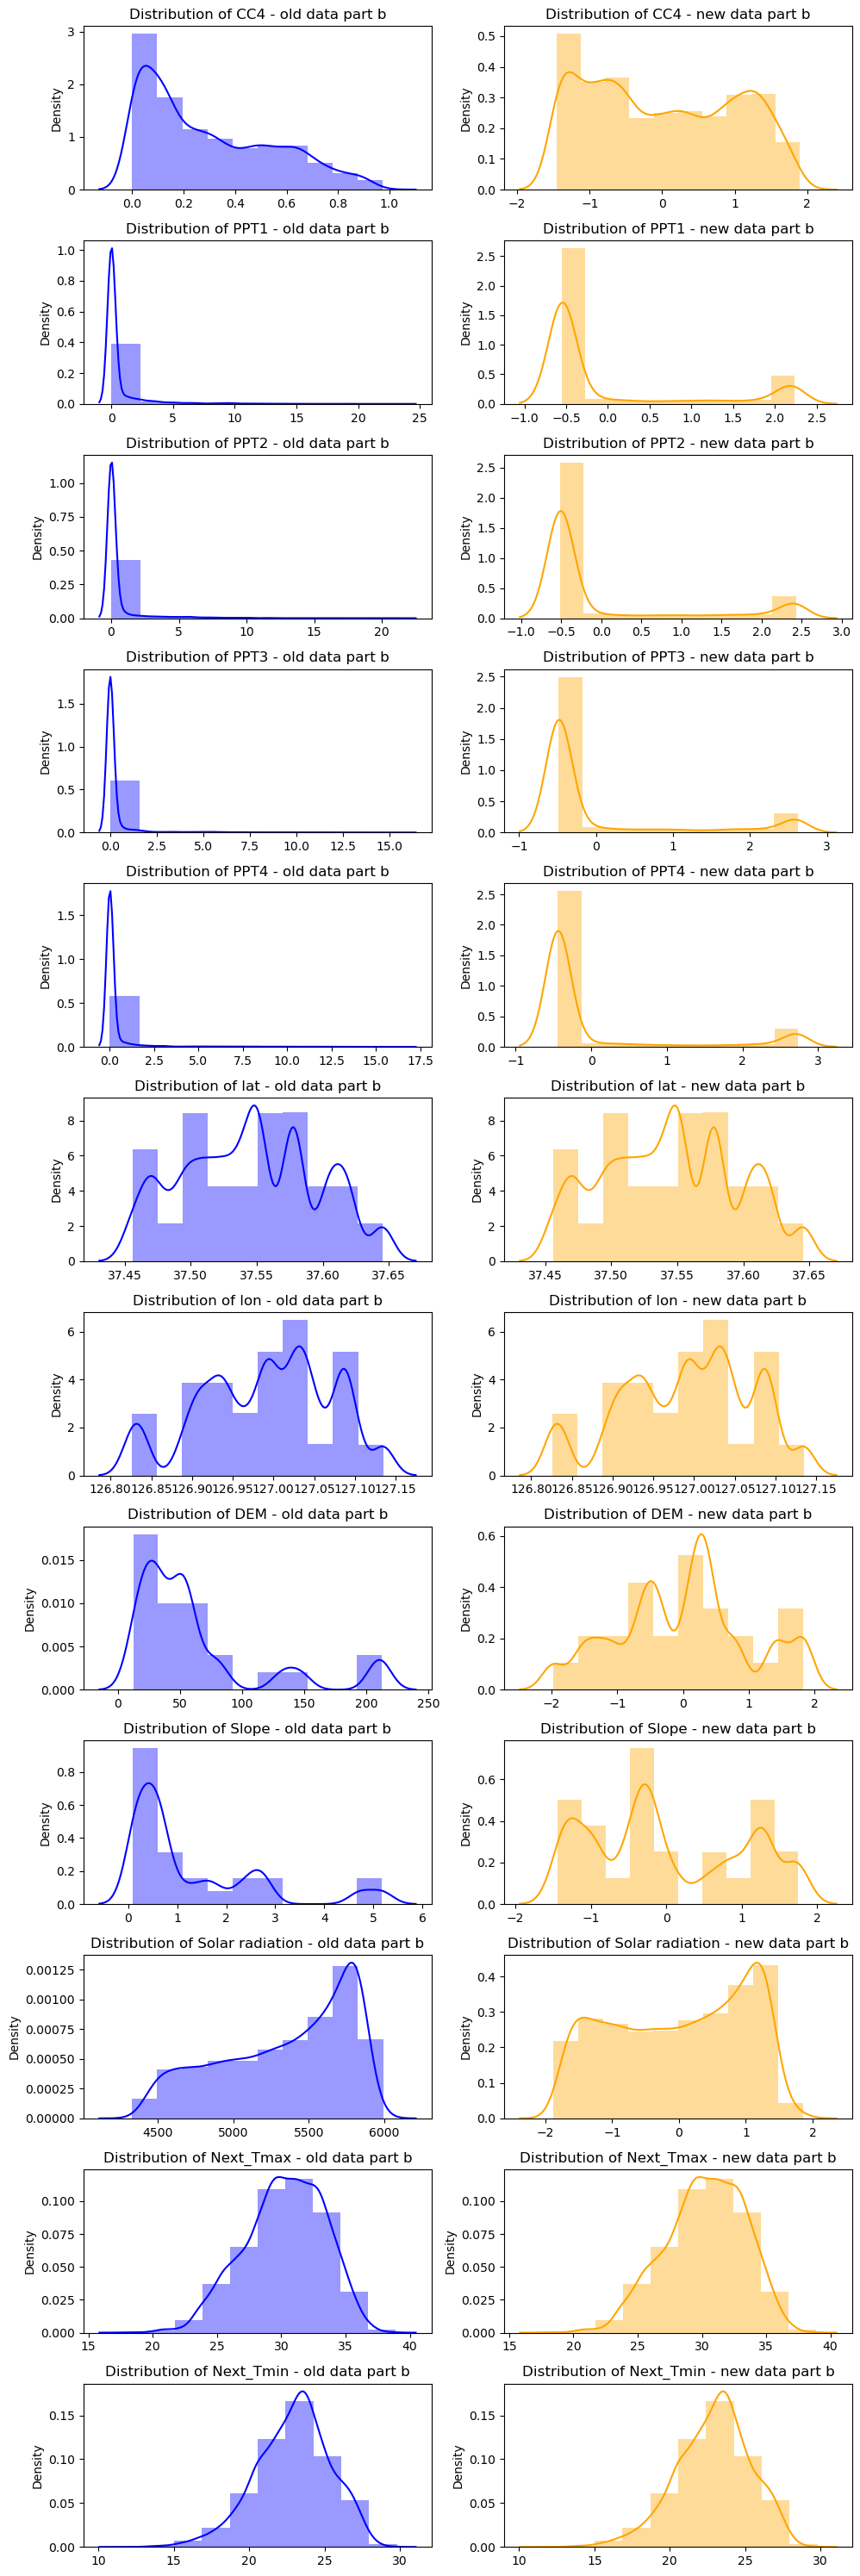

In [36]:
### Checking the distribution of data before and after handling skewness in dataset part b with distplot.
plt.figure (figsize = (10,30))
plotnumber = 1
for i in dfb_old.columns:
    if plotnumber<=24:
        plt.subplot(12,2,plotnumber)
        sns.distplot(dfb_old[i], kde=True, color='blue', bins=10)
        plt.title(f'Distribution of {i} - old data part b')
        plt.xlabel('')
        plt.ylabel('Density')
        plt.subplot(12, 2, plotnumber+1)
        sns.distplot(dfb_new[i], kde=True, color='orange', bins=10)
        plt.title(f'Distribution of {i} - new data part b')
        plt.xlabel('')
        plt.ylabel('Density')
    plotnumber+=2    
plt.tight_layout()
plt.show() 

### Observations:
- Before handling skewness, following columns of Part b ('CC4', 'PPT1', 'PPT2', 'PPT3', 'PPT4', 'DEM', 'Slope', 'Solar radiation') had skewness.
- Basis above dist plot between old and new data, it can be easily see the changes in distribution of data, which leads to almost normal distribution (in new dataset).
- Except following columns ('PPT1', 'PPT2', 'PPT3', 'PPT4'), where significant improvement can be seen, but skewness has not completed resolved. The same observation has been seen in box plot too and reason would be same for skewness as well.
- Hence, will go further with updated dataset (by handling skewness and outliers)

### Action to be taken:
- Further will check the impactness of skewed columns in feature engineering and accordingly further action will be done.

In [37]:
df_updated = df_new.copy() ### copying new dataset (after handling skewness and outliers) into old dataset for further process.
df_updated.shape

(7483, 24)

### Observations:
- Updated dataset includes 7483 rows and 24 columns.

### Checking relationship between Target Variable 1 and all features

In [38]:
## Separating dataset into features and target variable 1 (Next_Tmax)
x1 = df_updated.drop(['Next_Tmax'], axis=1)
y1 = df_updated['Next_Tmax']
print('List of features: ', x1.columns)
print('\n Data shape: ', x1.shape)

List of features:  Index(['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3', 'CC4',
       'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmin'],
      dtype='object')

 Data shape:  (7483, 23)


### Observations:
- Can see dataset separated into features and target variable 1

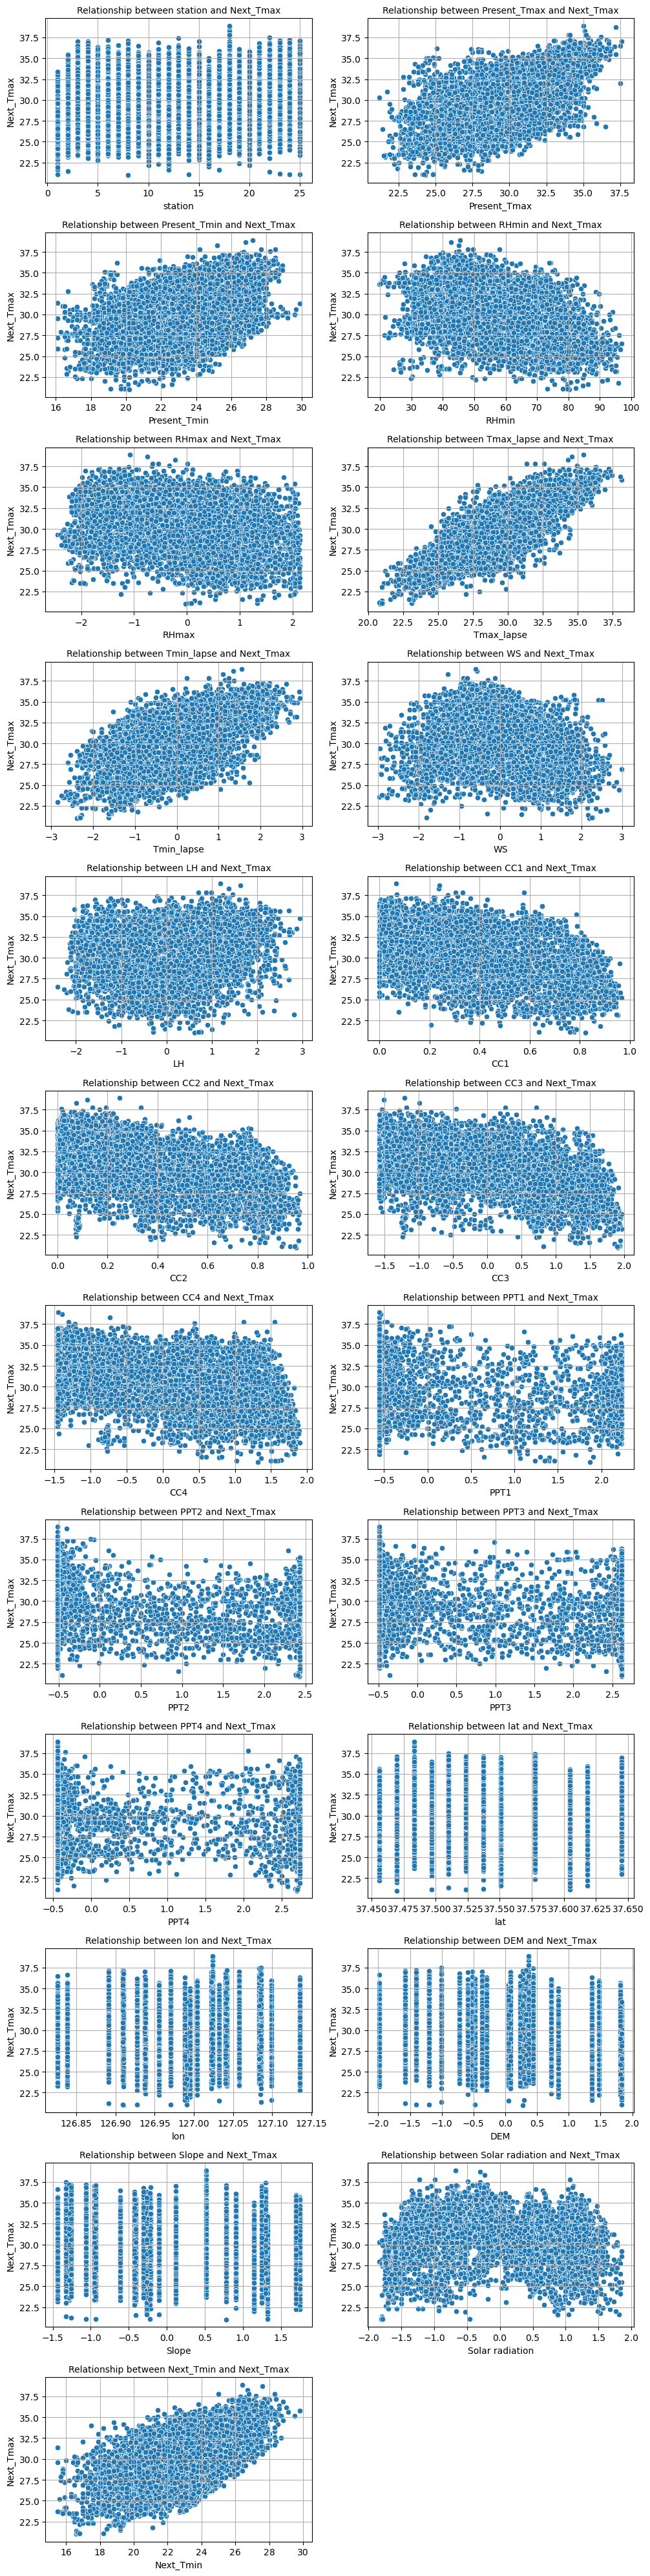

In [39]:
plt.figure(figsize = (10, 40))
plotnumber = 1
for i in x1:
    if plotnumber <=23:
        plt.subplot(12, 2, plotnumber)
        sns.scatterplot(x=i, y=y1, data=df_updated)
        plt.xlabel(i, fontsize = 10)
        plt.ylabel('Next_Tmax', fontsize = 10)
        plt.grid(axis='both')
        plt.title(f'Relationship between {i} and Next_Tmax', fontsize = 10)
    plotnumber+=1  
plt.tight_layout()

### Observations:
- Relationship between station and Next_Tmax: No specific pattern can be seen.
- Relationship between Present_Tmax and Next_Tmax: +ve relation.
- Relationship between Present_Tmin and Next_Tmax: +ve relation.
- Relationship between RHmin and Next_Tmax: -ve relation.
- Relationship between RHmax and Next_Tmax: -ve relation.
- Relationship between Tmax_lapse and Next_Tmax: +ve relation.
- Relationship between Tmin_lapse and Next_Tmax: +ve relation.
- Relationship between WS and Next_Tmax: -ve relation.
- Relationship between LH and Next_Tmax: No relation
- Relationship between CC1 and Next_Tmax: -ve relation
- Relationship between CC2 and Next_Tmax: -ve relation
- Relationship between CC3 and Next_Tmax: -ve relation
- Relationship between CC4 and Next_Tmax: -ve relation
- Relationship between PPT1 and Next_Tmax: -ve relation, seems not that strong.
- Relationship between PPT2 and Next_Tmax: -ve relation, seems not that strong.
- Relationship between PPT3 and Next_Tmax: -ve relation, seems not that strong.
- Relationship between PPT4 and Next_Tmax: -ve relation, seems not that strong.
- Relationship between lat and Next_Tmax: No specific pattern can be seen.
- Relationship between lon and Next_Tmax: No specific pattern can be seen.
- Relationship between DEM and Next_Tmax: No specific pattern can be seen.
- Relationship between Slope and Next_Tmax: No specific pattern can be seen.
- Relationship between Solar radiation and Next_Tmax: -ve relation
- Relationship between Next_Tmin and Next_Tmax: +ve relation

### Action to be taken:
- Above observation will be reconfirmed with heatmap method in details, which help us to find multicorrelation between features too along with feature and target variable.

### Checking relationship between Target Variable 2 and all features

In [40]:
## Separating dataset into features and target variable 2 (Next_Tmin)
x2 = df_updated.drop(['Next_Tmin'], axis=1)
y2 = df_updated['Next_Tmin']
print('List of features: ', x2.columns)
print('\n Data shape: ', x2.shape)

List of features:  Index(['station', 'Present_Tmax', 'Present_Tmin', 'RHmin', 'RHmax',
       'Tmax_lapse', 'Tmin_lapse', 'WS', 'LH', 'CC1', 'CC2', 'CC3', 'CC4',
       'PPT1', 'PPT2', 'PPT3', 'PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

 Data shape:  (7483, 23)


### Observations:
- Can see dataset separated into features and target variable 2

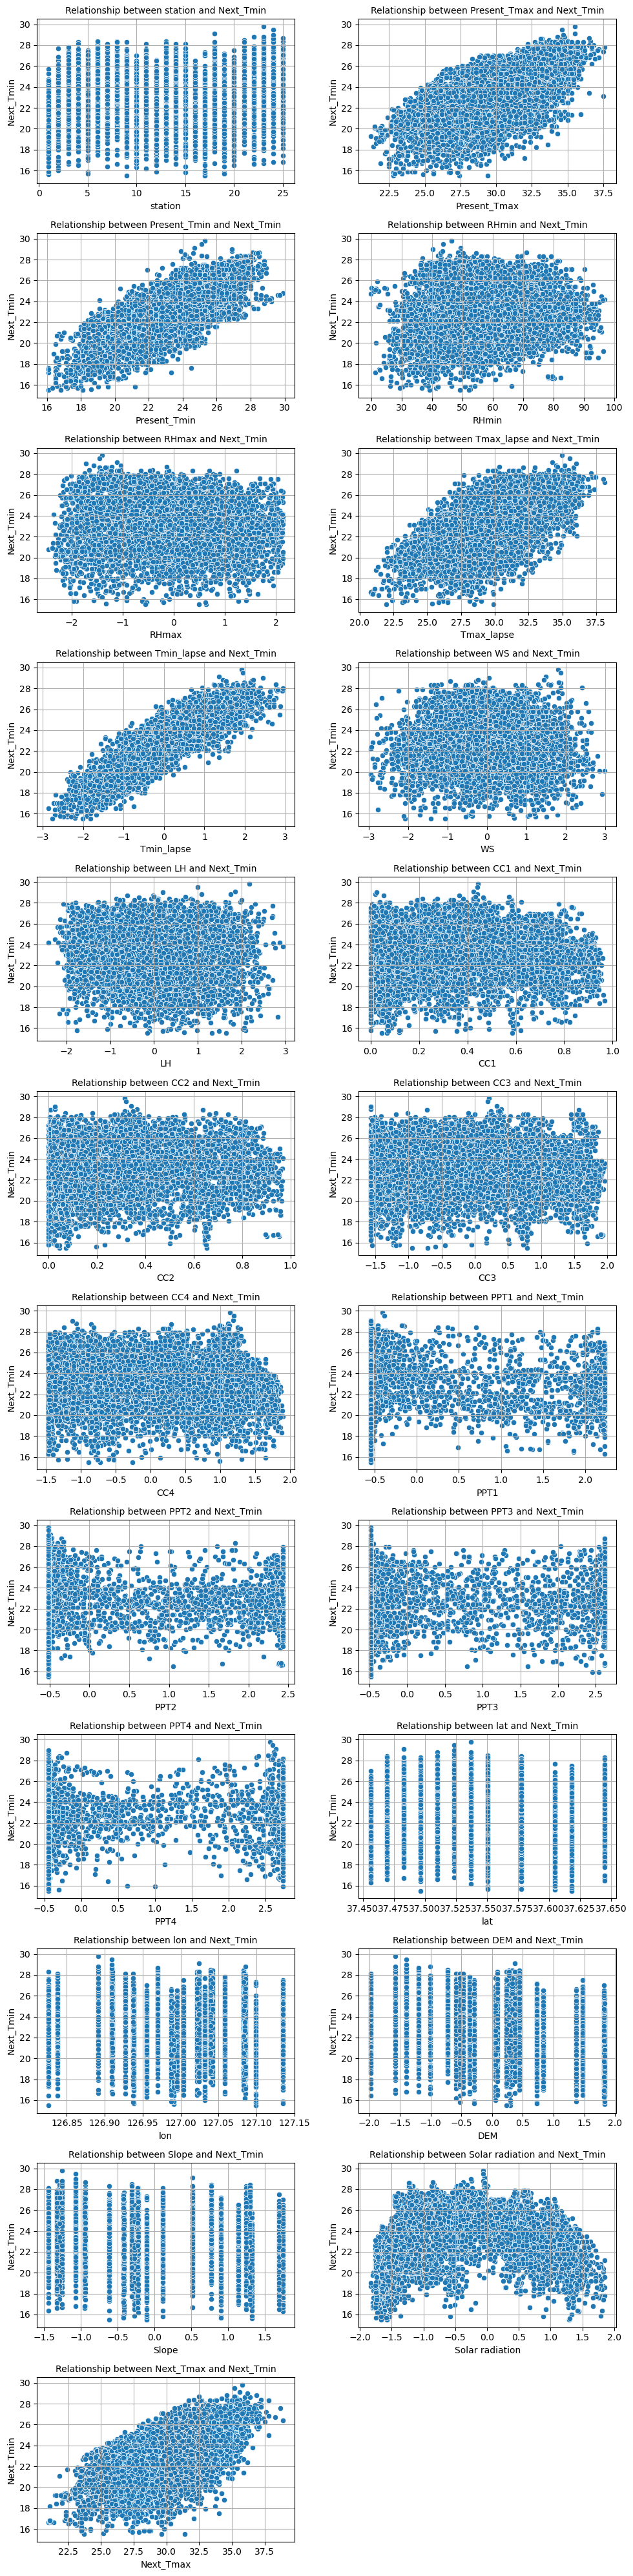

In [41]:
plt.figure(figsize = (10, 40))
plotnumber = 1
for i in x2:
    if plotnumber <=23:
        plt.subplot(12, 2, plotnumber)
        sns.scatterplot(x=i, y=y2, data=df_updated)
        plt.xlabel(i, fontsize = 10)
        plt.ylabel('Next_Tmin', fontsize = 10)
        plt.grid(axis='both')
        plt.title(f'Relationship between {i} and Next_Tmin', fontsize = 10)
    plotnumber+=1  
plt.tight_layout()

### Observations:
- Relationship between station and Next_Tmin: No specific pattern can be seen.
- Relationship between Present_Tmax and Next_Tmin: +ve relation.
- Relationship between Present_Tmin and Next_Tmin: +ve relation.
- Relationship between RHmin and Next_Tmin: +ve relation, seems not that strong.
- Relationship between RHmax and Next_Tmin: - No relation.
- Relationship between Tmax_lapse and Next_Tmin: +ve relation.
- Relationship between Tmin_lapse and Next_Tmin: +ve relation.
- Relationship between WS and Next_Tmin: No relation.
- Relationship between LH and Next_Tmin: -ve relation.
- Relationship between CC1 and Next_Tmin: No relation
- Relationship between CC2 and Next_Tmin: No relation
- Relationship between CC3 and Next_Tmin: No relation
- Relationship between CC4 and Next_Tmin: -ve relation, seems not that strong
- Relationship between PPT1 and Next_Tmin: -ve relation.
- Relationship between PPT2 and Next_Tmin:  -ve relation.
- Relationship between PPT3 and Next_Tmin:  -ve relation.
- Relationship between PPT4 and Next_Tmin:  -ve relation.
- Relationship between lat and Next_Tmin: No specific pattern can be seen.
- Relationship between lon and Next_Tmin: No specific pattern can be seen.
- Relationship between DEM and Next_Tmin: No specific pattern can be seen.
- Relationship between Slope and Next_Tmin: No specific pattern can be seen.
- Relationship between Solar radiation and Next_Tmin: -ve relation
- Relationship between Next_Tmax and Next_Tmin: +ve relation

### Action to be taken:
- Above observation will be reconfirmed with heatmap method in details, which help us to find multicorrelation between features too along with feature and target variable.

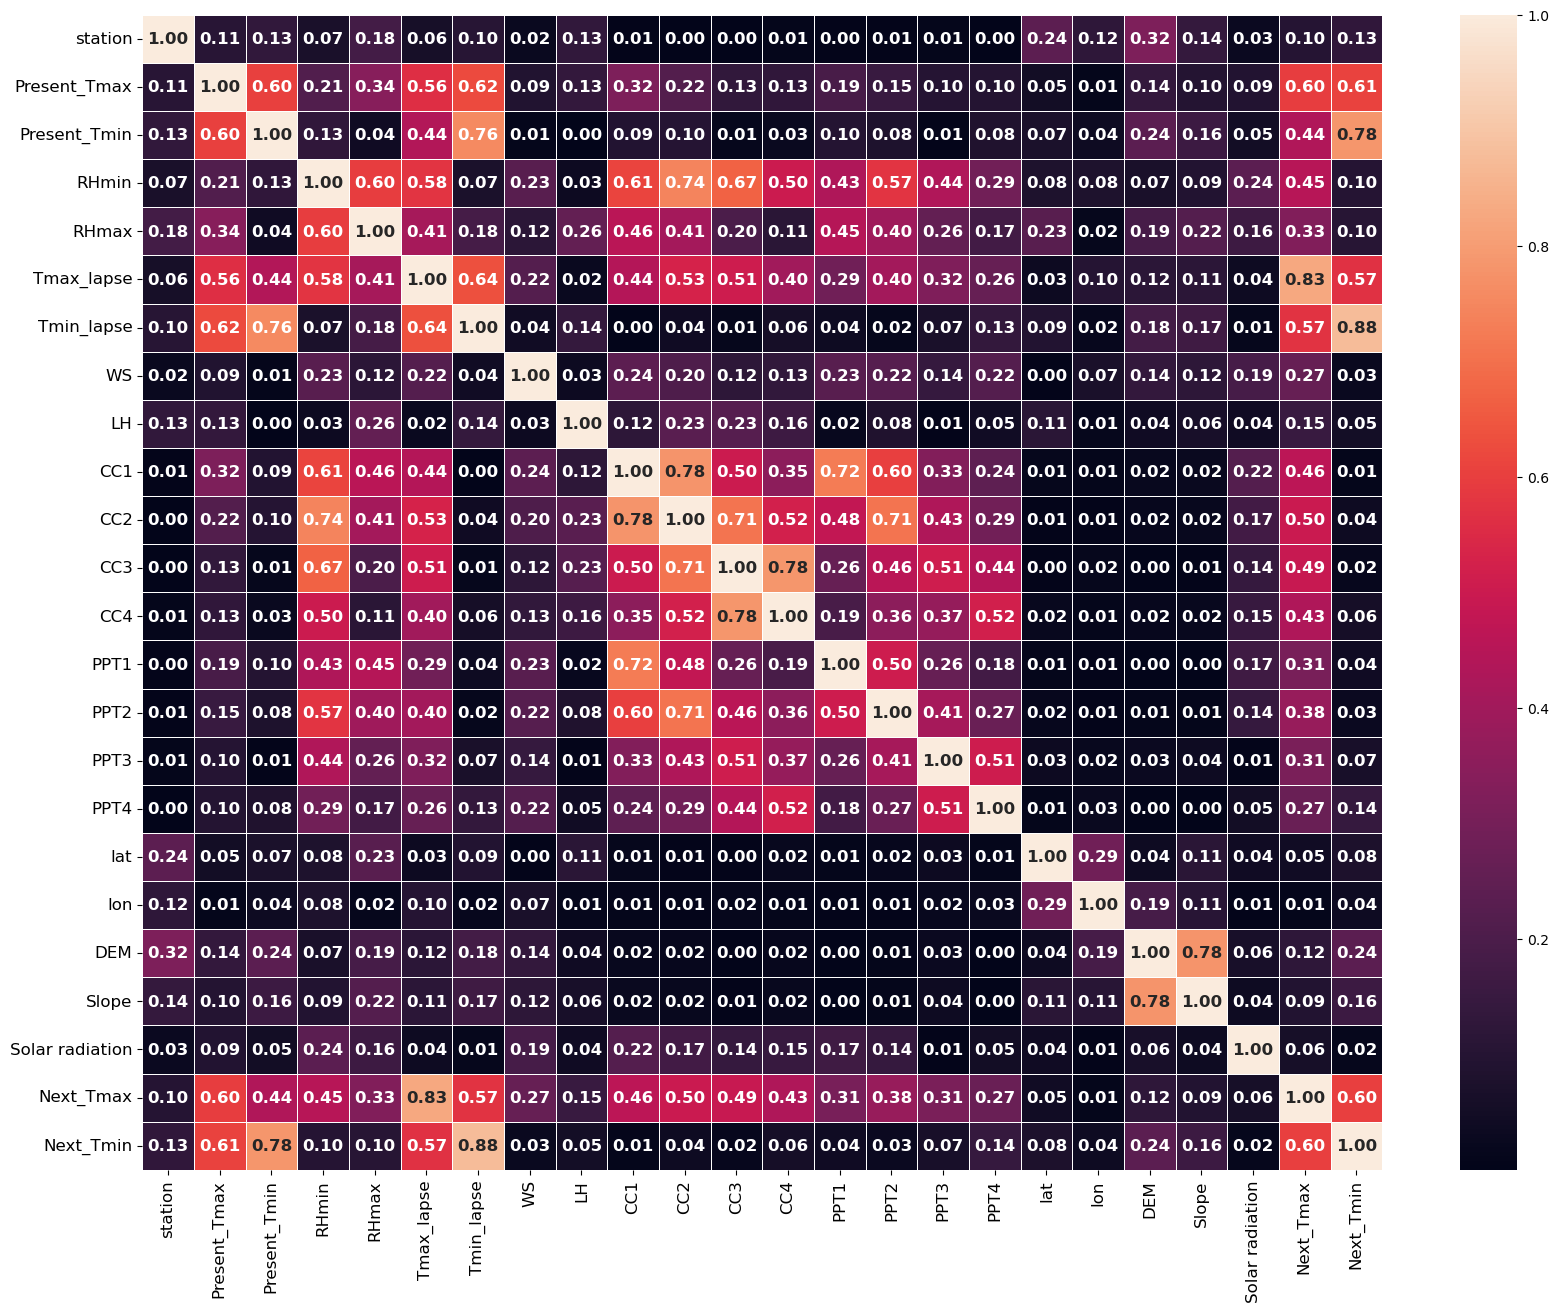

In [42]:
## In order to check the relation between features and both target variables via Heatmap.
plt.figure(figsize=(20, 15))
cor = df_updated.corr().abs()
sns.heatmap(cor, annot=True, annot_kws={'size':12, 'weight': 'bold'}, fmt=".2f", linewidth=.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations:
- +ve relation between Next_Tmax with features: Tmax_lapse (83%) and Present_Tmax (60%)
- +ve relation between Next_Tmin with features: Tmin_lapse (88%) and Present_Tmin (78%)
- +ve multicorrelation between features: 
	- Present_Tmax v/s Tmin_lapse (62%), Present_Tmax v/s Present_Tmin (60%)
	- Present_Tmin v/s Tmin_lapse (76%)
	- RHmin v/s CC2 (74%), RHmin v/s CC3 (67%)
	- Tmax_lapse v/s Tmin_lapse (64%)
	- CC1 v/s CC2 (78%), CC1 v/s PPT1 (72%)
	- CC2 v/s PPT2 (71%), CC2 v/s CC3 (71%)
	- CC3 v/s CC4 (78%)
	- DEM v/s Slope (78%)
- Can see multicorrelation features, which can be further deal with feature enigneering.
- Also, can see above mmentioned columns with high skewness ('PPT1', 'PPT2', 'PPT3', 'PPT4'), have no string relation with any of the target variables, so we can think to drop the same.
- Nevertheless, will take the help of Select Kbest method to find the best features.

### Action to be taken:
- Will do feature engineering basis Select K Best method separately for each target variable.

## Further analysis for Building Regression Model for Target Variable 1 (Next_Tmax)

In [43]:
df_reg1 = df_updated.copy() ## creating new database for further analysis and builiding regression model for Target Variable 1 by copying existing database

In [44]:
## separating dataset into features and target variable1
x_reg1 = df_reg1.drop(['Next_Tmax'], axis=1)
y_reg1 = df_reg1['Next_Tmax']

In [45]:
## Standarization of features for further model building process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_reg1)
x_reg1 = pd.DataFrame(x_scaled, columns = x_reg1.columns)
x_reg1

station  Present_Tmax  Present_Tmin     RHmin     RHmax  Tmax_lapse  \
0    -1.666330     -0.375987     -0.805128  0.107237  0.271794   -0.562280   
1    -1.527808      0.720230     -0.718614 -0.305411  0.184988    0.057454   
2    -1.389287      0.617460      0.016747 -0.551454 -0.771123    0.141384   
3    -1.250765      0.754487      0.060003  0.106142  1.312474    0.006503   
4    -1.112244      0.548946     -0.588845 -0.036108  0.110366   -0.199551   
...        ...           ...           ...       ...       ...         ...   
7478  1.104099     -2.294368     -2.362363 -2.204273 -1.379220   -0.653467   
7479  1.242620     -2.499908     -2.535389 -1.832008 -0.805613   -1.039903   
7480  1.381142     -2.225854     -2.665158 -2.062944 -1.322600   -1.162980   
7481  1.519663     -2.225854     -2.405619 -2.248922 -1.465490   -0.933408   
7482  1.658185     -2.260111     -2.535389 -2.325196 -1.469941   -0.609228   

      Tmin_lapse        WS        LH       CC1  ...     PPT1      PPT2  \
0      -0.343154  0.102851  0.326083 -0.511259  ... -0.54989 -0.511153   
1       0.124040 -0.628684 -0.198757 -0.543500  ... -0.54989 -0.511153   
2       0.379945 -0.312604 -1.390347 -0.605256  ... -0.54989 -0.511153   
3      -0.202058 -0.660380  0.219737 -0.578404  ... -0.54989 -0.511153   
4      -0.129866 -0.596414  1.308547 -0.826599  ... -0.54989 -0.511153   
...          ...       ...       ...       ...  ...      ...       ...   
7478   -2.036714 -0.021055 -1.983936 -1.202929  ... -0.54989 -0.511153   
7479   -2.174457 -0.571920  0.671274 -1.151129  ... -0.54989 -0.511153   
7480   -1.897140 -0.305492  0.399045 -1.290295  ... -0.54989 -0.511153   
7481   -1.909849 -0.056998 -0.351926 -1.267985  ... -0.54989 -0.511153   
7482   -1.972559  0.351615 -2.017752 -1.218015  ... -0.54989 -0.511153   

          PPT3      PPT4       lat       lon       DEM     Slope  \
0    -0.481318 -0.435745  1.197945 -0.002180  1.845658  1.335601   
1    -0.481318 -0.435745  1.197945  0.515170  0.063270 -0.402755   
2    -0.481318 -0.435745  0.660048  0.843247 -0.359323 -0.946391   
3    -0.481318 -0.435745  2.002799  0.388987  0.092318  1.255141   
4    -0.481318 -0.435745  0.124143  1.814857 -0.284857 -0.418900   
...        ...       ...       ...       ...       ...       ...   
7478 -0.481318 -0.435745  0.124143  0.616117 -0.717592 -0.298099   
7479 -0.481318 -0.435745 -0.682703  1.196559 -1.002554 -1.321930   
7480 -0.481318 -0.435745 -0.144806 -1.264012 -1.573496 -1.254090   
7481 -0.481318 -0.435745 -0.413754 -1.036882 -1.396748 -1.062404   
7482 -0.481318 -0.435745 -0.413754 -0.267165 -1.189658 -0.933079   

      Solar radiation  Next_Tmin  
0            1.855060  -0.751267  
1            1.397451  -0.204525  
2            1.377028   0.384275  
3            1.353741   0.552503  
4            1.362871  -0.204525  
...               ...        ...  
7478        -1.761065  -2.223266  
7479        -1.778288  -2.475609  
7480        -1.776469  -2.055038  
7481        -1.782411  -1.760638  
7482        -1.766756  -2.349438  

[7483 rows x 23 columns]

### Observations:
- Can see all features are standarized and ready for further analysis.
- Action to be taken:
- Feature selection will be done by Select K Best method

In [46]:
## importing Select K best library
from sklearn.feature_selection import SelectKBest, f_classif

In [47]:
best_features = SelectKBest(score_func=f_classif, k=23)
fit = best_features.fit(x_reg1,y_reg1)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_reg1.columns)
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['Feature_Name', 'Score']
print(features_scores.nlargest(23,'Score'))

       Feature_Name      Score
5        Tmax_lapse  99.798146
22        Next_Tmin  28.140188
1      Present_Tmax  27.459853
6        Tmin_lapse  25.661683
10              CC2  16.955203
11              CC3  16.177162
9               CC1  14.415963
3             RHmin  13.353085
12              CC4  13.182708
2      Present_Tmin  13.164781
14             PPT2   9.813041
15             PPT3   8.828166
16             PPT4   7.866596
13             PPT1   6.460957
4             RHmax   6.442867
7                WS   5.094321
8                LH   2.135554
19              DEM   1.845316
0           station   1.552553
21  Solar radiation   1.486581
20            Slope   1.452749
17              lat   1.041379
18              lon   0.957636


### Observations:
- Basis observation of above plotting for relationship between features and target variable with Select K Best method.
- We have selected following features (Tmax_lapse, Next_Tmin, Present_Tmax, Tmin_lapse, CC2, CC3, CC1, RHmin, CC4, and Present_Tmin) as the final features.
- These features have obtained relatively higher scores compared to others and might have more significant predictive power or correlation with the target variable than the lower-scoring features.

### Action to be taken:
- New dataset will be created by dropping lowest scored features for further models building.

In [48]:
x_reg1 = x_reg1.drop(['PPT2', 'PPT3', 'PPT4', 'PPT1', 'RHmax', 'WS', 'LH', 'DEM', 'station',
                     'Solar radiation', 'Slope', 'lat', 'lon'], axis=1)
x_reg1

Present_Tmax  Present_Tmin     RHmin  Tmax_lapse  Tmin_lapse       CC1  \
0        -0.375987     -0.805128  0.107237   -0.562280   -0.343154 -0.511259   
1         0.720230     -0.718614 -0.305411    0.057454    0.124040 -0.543500   
2         0.617460      0.016747 -0.551454    0.141384    0.379945 -0.605256   
3         0.754487      0.060003  0.106142    0.006503   -0.202058 -0.578404   
4         0.548946     -0.588845 -0.036108   -0.199551   -0.129866 -0.826599   
...            ...           ...       ...         ...         ...       ...   
7478     -2.294368     -2.362363 -2.204273   -0.653467   -2.036714 -1.202929   
7479     -2.499908     -2.535389 -1.832008   -1.039903   -2.174457 -1.151129   
7480     -2.225854     -2.665158 -2.062944   -1.162980   -1.897140 -1.290295   
7481     -2.225854     -2.405619 -2.248922   -0.933408   -1.909849 -1.267985   
7482     -2.260111     -2.535389 -2.325196   -0.609228   -1.972559 -1.218015   

           CC2       CC3       CC4  Next_Tmin  
0    -0.586402 -0.537194 -0.582172  -0.751267  
1    -0.399761 -0.549590 -0.600810  -0.204525  
2    -0.377547 -0.313060 -0.517944   0.384275  
3    -0.500220 -0.540158 -0.562969   0.552503  
4    -0.406685 -0.444221 -0.364247  -0.204525  
...        ...       ...       ...        ...  
7478 -1.263667 -1.574980 -1.425894  -2.223266  
7479 -1.285695 -1.574975 -1.325809  -2.475609  
7480 -1.065368 -1.574980 -1.459523  -2.055038  
7481 -1.089042 -1.574980 -1.459523  -1.760638  
7482 -1.147884 -1.574980 -1.453385  -2.349438  

[7483 rows x 10 columns]

### Observations:
- After removing features basis F score, final dataset has 7483 rows and 10 columns

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Observations:
- Imported all regression model building related libraries.

In [50]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x_reg1, y_reg1, test_size = 0.25, random_state = 400)

### Observations:
- Randomly we have splited dataset into train (includes 75% of dataset) and test (includes 25% of dataset) of features and target variables.
- Also, we have chosen random_state as 400 (Arbitrary number)

### Action to be taken:
- Above set parameter will be used to train many regression models, to get the best performance model which will be further tune with the help of RandomSearch CV (Hyperparameter tuning).

In [51]:
### Instantiating the following models
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
GBR = GradientBoostingRegressor()
ABR = AdaBoostRegressor()
BR =  BaggingRegressor()
LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DTR = DecisionTreeRegressor()
KNR = KNeighborsRegressor()
svr = SVR()

In [52]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print('R2 score: ', r2_score(y_train, y_pred)*100)       
        print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
        print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, y_pred)))
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print("R2 Score:  ", r2_score(y_test, pred)*100)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test, pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
        print('\n')

In [53]:
models = [('RFR', RFR), ('ETR', ETR), ('GBR', GBR), ('ABR', ABR), ('BR', BR),  ('LR', LR), ('Lasso', lasso), ('Ridge', ridge), ('DTR', DTR), ('KNR', KNR), ('SVR', svr)]
for model_name, model in models:
    model.fit(x_train, y_train)

In [54]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFR

---------------Train Result---------------
R2 score:  98.39135447087678
Mean Absolute Error:  0.285221846044191
Mean Squared Error:  0.1475882984675693
Root Mean Squared Error:  0.38417222500796344

---------------Test Result---------------
R2 Score:   89.17221953967189
Mean Absolute Error:  0.7650192410475677
Mean Squared Error:  1.0282754179583107
Root Mean Squared Error:  1.0140391599727847


Model Name: ETR

---------------Train Result---------------
R2 score:  99.99999996115628
Mean Absolute Error:  1.425516786632629e-06
Mean Squared Error:  3.5637918744923344e-09
Root Mean Squared Error:  5.969750308423573e-05

---------------Test Result---------------
R2 Score:   90.98647825853715
Mean Absolute Error:  0.707129877071085
Mean Squared Error:  0.8559817840726885
Root Mean Squared Error:  0.9251928361550842


Model Name: GBR

---------------Train Result---------------
R2 score:  84.49327146026964
Mean Absolute Error:  0.9199446641580031
Mean Squared Error:  1.422694

### Observations:
- We have trained all above mentioned regression models.
- After comparing high R2 score, low metric scores (MAE, MSE, RMSE), it seems KNR model is fine for further hyper parameter tuning.
- In order to check overfitting, will do the cross validation on all models, so final conclusion can be made on best regression model.

### Action to be taken:
- Performing cross validation on all models to select best regression model.

In [55]:
from sklearn.model_selection import cross_val_score

### Observations:
- Imported Cross validation libary to perform cross validation on all above selected regression models.

In [56]:
for model_name, model in models:
    score = cross_val_score(model, x_reg1, y_reg1, cv=10)
    print(f"Model Name: {model_name}")
    print('R2 Score = ',r2_score(y_test, model.predict(x_test))*100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between R2 Score and Cross Validation Score = ', r2_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFR
R2 Score =  89.17221953967189
Cross validation score =  63.47999784735542
Difference between R2 Score and Cross Validation Score =  0.25692221692316475


Model Name: ETR
R2 Score =  90.98647825853715
Cross validation score =  63.83206617120345
Difference between R2 Score and Cross Validation Score =  0.2715441208733369


Model Name: GBR
R2 Score =  82.84940571456055
Cross validation score =  65.84176682518607
Difference between R2 Score and Cross Validation Score =  0.17007638889374477


Model Name: ABR
R2 Score =  74.51085445783443
Cross validation score =  59.57543092379891
Difference between R2 Score and Cross Validation Score =  0.1493542353403552


Model Name: BR
R2 Score =  87.34588080035728
Cross validation score =  60.47041602763002
Difference between R2 Score and Cross Validation Score =  0.26875464772727253


Model Name: LR
R2 Score =  77.69717889992481
Cross validation score =  66.77384853241716
Difference between R2 Score and Cross Validation Score =  0.1092

### Observations:
- After looking above output, we need to change our decision (earlier selected KNR) considering low difference between R2 and Cross validation scores (0.109). Basis we have identified two models (LR and Ridge), as both having same differenece between R2 and Cross validation scores.
- Earlier selected KNR model (basis highest R2 score) having more difference between R2 and Cross validation scores, may be due to overfitting.
- Will perform Hyperparameter tuning parameter on LR and Ridge models. Basis individual best performance, will proceed ahead with final model.

### Action to be taken:
- Perform hyperparameter tuning on LR and Ridge with RandomizedSearch CV method

In [57]:
## Hyperparameter tuning on LR
from sklearn.model_selection import RandomizedSearchCV

In [58]:
base_regressor = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'n_jobs': [1],
              'normalize': [True, False]                                          
             } 

### Observations:
- Parameters for LR model has been selected.
- Basis which will select best parameters to tune our selected model.

In [59]:
randomsearch = RandomizedSearchCV(base_regressor, param_grid, cv=5)
randomsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [1],
                                        'normalize': [True, False]})

### Observations:
- Can see LR model has beeen trained on above given parameters to check the best parameters for tuning the model in order to have best performance.

In [60]:
randomsearch.best_params_

{'normalize': True, 'n_jobs': 1, 'fit_intercept': True}

### Observations:
- Above selected is the best parameters which can be used to tune our LR model, in order to get best performance of the model.
- However, will do the tweak in final selected parameter to get best model performance as much as possible.

In [61]:
randomsearch.best_score_

0.7631695917047849

### Observations:
- Basis above selected parameters, best score from randomsearch is 0.76.

### Action to be taken:
- Will use this parameters into our final model and accordingly further tuning can be done as required.

In [62]:
Test_model_1 = LinearRegression(normalize=True, n_jobs=1, fit_intercept=True)
Test_model_1.fit(x_train,y_train)

LinearRegression(n_jobs=1, normalize=True)

### Observations:
- Can see LR model has been trained on above selected best parameters.

### Action to be taken:
- Let's check the R2 score and other metric scores in order to check performance of model basis selected parameters.

In [63]:
y_pred = Test_model_1.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_1.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49318948161934

---------------Test Result---------------
R2 Score:   77.69717889992481
Mean Absolute Error:  1.1210274923435481
Mean Squared Error:  2.1180188102589517
Root Mean Squared Error:  1.455341475482284




### Observations:
- The model seems to perform slightly better on the test data than on the training data, indicating that it's generalizing reasonably well.
- The R2 score of around 77.69 indicates that the model explains a significant portion of the variance in the test dataset.

### Action to be taken:
- Will tweak the selected parameters further to improve test result as much as possible.

In [64]:
Test_model_2 = LinearRegression(normalize=False, n_jobs=1, fit_intercept=True)
Test_model_2.fit(x_train,y_train)

y_pred = Test_model_2.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_2.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49318948161935

---------------Test Result---------------
R2 Score:   77.69717889992481
Mean Absolute Error:  1.1210274923435481
Mean Squared Error:  2.1180188102589517
Root Mean Squared Error:  1.455341475482284




### Observations:
- Further changing normalize=False (earlier was True) along with other best selected parameters, can see R2 score has not changed in test and train results.
- It seems changing normalize=False, makes no changes in model performance for train and test.
- Will tune other parameters by retaining changing normalize=False.

### Action to be taken:
- Will tune other parameters by retaining changing normalize=False.

In [65]:
Test_model_3 = LinearRegression(normalize=False, n_jobs=10, fit_intercept=True)
Test_model_3.fit(x_train,y_train)

y_pred = Test_model_3.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_3.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49318948161935

---------------Test Result---------------
R2 Score:   77.69717889992481
Mean Absolute Error:  1.1210274923435481
Mean Squared Error:  2.1180188102589517
Root Mean Squared Error:  1.455341475482284




### Observations:
- Further changing n_jobs=10 (earlier was 1) along with other best selected parameters (normalize=False), can see R2 score has not changed in test and train results.
- It seems changing n_jobs=10, makes no changes in model performance for train and test.

### Action to be taken:
- Will tune other parameters by retaining changing normalize=False.

In [66]:
Test_model_4 = LinearRegression(normalize=False, n_jobs=30, fit_intercept=True)
Test_model_4.fit(x_train,y_train)

y_pred = Test_model_4.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_4.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49318948161935

---------------Test Result---------------
R2 Score:   77.69717889992481
Mean Absolute Error:  1.1210274923435481
Mean Squared Error:  2.1180188102589517
Root Mean Squared Error:  1.455341475482284




### Observations:
- Further changing n_jobs=30 (earlier was 1) along with other best selected parameters (normalize=False), can see R2 score has not changed in test and train results.
- It seems changing n_jobs=(10, 30), makes no changes in model performance for train and test.

### Action to be taken:
- Will tune other parameters by retaining changing normalize=False.

In [67]:
Test_model_5 = LinearRegression(normalize=False, n_jobs=1, fit_intercept=False)
Test_model_5.fit(x_train,y_train)

y_pred = Test_model_5.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_5.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  -9932.817514254386

---------------Test Result---------------
R2 Score:   -9619.020879781572
Mean Absolute Error:  30.340671709074044
Mean Squared Error:  922.9805031529157
Root Mean Squared Error:  30.380594186962764




### Observations:
- Further changing fit_intercept=False (earlier was True) along with other best selected parameters (normalize=False, n_jobs=1), can see R2 score has drastic reduced in test to -9619.02% from 77.69% and R2 score has drastic reduced in train to -9932.81% from 76.49% 
- It seems changing fit_intercept=False, R2 score has reduced drastically for train and test.

### Best Parameter (basis highest R2 score):
- fit_intercept=True

### Action to be taken:
- Will tune other parameters by retaining fit_intercept=True.

In [68]:
Test_model_6 = LinearRegression(normalize=True, n_jobs=10, fit_intercept=True)
Test_model_6.fit(x_train,y_train)

y_pred = Test_model_6.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_6.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49318948161934

---------------Test Result---------------
R2 Score:   77.69717889992481
Mean Absolute Error:  1.1210274923435481
Mean Squared Error:  2.1180188102589517
Root Mean Squared Error:  1.455341475482284




### Observations:
- Further changing again normalize=True along with other best selected parameters (n_jobs=10, fit_intercept=True), can see R2 score has not changes in test and train results.
- It seems changing normalize=True, R2 score has not changes in test and train results.
- It has been observed no changes in R2 score after tweaking each parameters.

### Best Parameter (basis highest R2 score):
- normalize=True
- n_jobs=1
- fit_intercept=True

### Action to be taken:
- Basis above best parameters, LR model can give best R2 score as 77.69% on test data and 76.49% on train data.
- Will apply hyper parameter tuning on Ridge Model to get best R2 score as much as possible.

In [69]:
Final1 = LinearRegression(normalize=True, n_jobs=1, fit_intercept=True)
Final1.fit(x_train,y_train)

y_pred = Final1.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final1.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49318948161934

---------------Test Result---------------
R2 Score:   77.69717889992481
Mean Absolute Error:  1.1210274923435481
Mean Squared Error:  2.1180188102589517
Root Mean Squared Error:  1.455341475482284




### Observations:
- After final tuning, can see R2 score of test data can give 77.69% performance. However, train data can give R2 score as 76.49%.

### Action to be plan:
- Will apply hyper parameter tuning on Ridge Model to get best R2 score as much as possible.

In [70]:
### Hyperparameter tuning on Ridge Model
base_regressor_1 = Ridge()
param_grid_1 = {'alpha': [0.1, 1.0],
              'fit_intercept': [True],
              'solver': ['auto', 'svd', 'lsqr', 'sag', 'saga'],
              'random_state': [100],
              'max_iter': [100, 150]
             } 

### Observations:
- Parameters for Ridge model has been selected.
- Basis which will select best parameters to tune our selected model.

In [71]:
randomsearch_1 = RandomizedSearchCV(base_regressor_1, param_grid_1, cv=5)
randomsearch_1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0],
                                        'fit_intercept': [True],
                                        'max_iter': [100, 150],
                                        'random_state': [100],
                                        'solver': ['auto', 'svd', 'lsqr', 'sag',
                                                   'saga']})

### Observations:
- Can see data has beeen trained on above given parameters to check the best parameters for tuning the model in order to have best performance.

In [72]:
randomsearch_1.best_params_

{'solver': 'lsqr',
 'random_state': 100,
 'max_iter': 100,
 'fit_intercept': True,
 'alpha': 1.0}

### Observations:
- Above selected is the best parameters which can be used to tune our Ridge model, in order to get best performance of the model.
- However, will do the tweak in final selected parameter to get best model performance as much as possible.

In [73]:
randomsearch_1.best_score_

0.7631930336182577

### Observations:
- Basis above selected parameters, best score from randomsearch is 0.76%.

### Action to be taken:
- Will use this parameters into our final model and accordingly further tuning can be done as required.

In [74]:
Test_model_a = Ridge(solver='lsqr', random_state=100, max_iter=100, fit_intercept=True, alpha=1.0)
Test_model_a.fit(x_train,y_train)

Ridge(max_iter=100, random_state=100, solver='lsqr')

### Observations:
- Can see Ridge model has been trained on above selected best parameters.

### Action to be taken:
- Let's check the R2 score and other metric scores in order to check performance of model basis selected parameters.

In [75]:
y_pred = Test_model_a.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_a.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.49219737971525

---------------Test Result---------------
R2 Score:   77.68453184973619
Mean Absolute Error:  1.1211516541458275
Mean Squared Error:  2.119219855188362
Root Mean Squared Error:  1.4557540503767668




### Observations:
- The model seems to perform slightly better on the test data than on the training data, indicating that it's generalizing reasonably well.
- The R2 score of around 77.68% indicates that the model explains a significant portion of the variance in the test dataset.

### Action to be taken:
- Will tweak the selected parameters further to improve test result as much as possible.

In [76]:
Test_model_b = Ridge(solver='auto', random_state=100, max_iter=100, fit_intercept=True, alpha=1.0)
Test_model_b.fit(x_train,y_train)
y_pred = Test_model_b.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_b.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.4931769403209

---------------Test Result---------------
R2 Score:   77.69676377520622
Mean Absolute Error:  1.1210436160307797
Mean Squared Error:  2.1180582331623867
Root Mean Squared Error:  1.455355019630051




### Observations:
- Slight changes in R2 score for test and train dataset, after changing solver='auto' (earlier was lsqr).
 - It seems tweaking parameters also not increasing the model performance.

### Conclusions on selecting Ridge model over LR:
- Can see no difference in R2 scores between LR and Ridge Models for Test and Train.
   - R2 score for test (LR and Ridge model) - 77.69%
   - R2 score for train (LR and Ridge model) - 76.49%
- Here are a few justifications to opt for the Ridge model over LR:
    - Ridge regression applies L2 regularization, adding a penalty term to the coefficients. This helps in reducing overfitting by penalizing large coefficients, making the model more robust against outliers and noise.
    - It can handle multicollinearity (high correlation between predictors) more effectively compared to Linear Regression. It mitigates the issue by shrinking the coefficients of correlated variables towards each other.
    - The regularization in Ridge regression helps prevent overfitting, resulting in models that generalize better to unseen data. It tends to perform consistently well even on new datasets.
    - Ridge regression often provides more stable and consistent results across various datasets compared to plain Linear Regression.
    - While both models might have similar R2 scores on your specific dataset, Ridge regression generally strikes a better balance between bias and variance, minimizing the trade-off.
    
### Action to be taken:
- Will create final model of Ridge basis selected parameters.
- Will check relation between y_test and y_pred graphically to afirm my conclusion.
- Will save the model for further production    

In [77]:
Final_Model_1 = Ridge(solver='auto', random_state=100, max_iter=100, fit_intercept=True, alpha=1.0)
Final_Model_1.fit(x_train,y_train)
y_pred = Final_Model_1.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_Model_1.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  76.4931769403209

---------------Test Result---------------
R2 Score:   77.69676377520622
Mean Absolute Error:  1.1210436160307797
Mean Squared Error:  2.1180582331623867
Root Mean Squared Error:  1.455355019630051




### Observations:
- After final tuning, can see R2 score of test data can give 77.69% performance. However, train data can give R2 score as 76.49%.

<AxesSubplot:xlabel='Next_Tmax'>

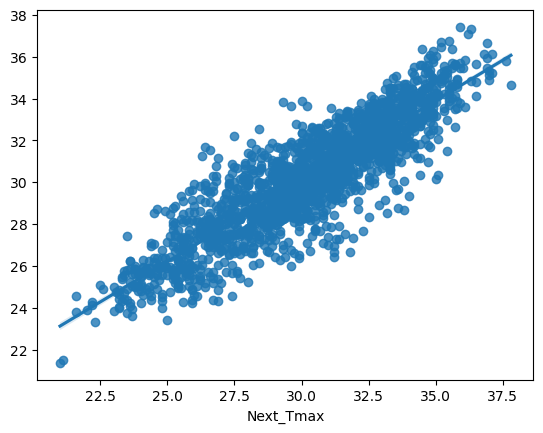

In [78]:
### Plotting to check relation betweeen y_test and y_pred
sns.regplot(x=y_test, y= pred)

### Observations:
It showing same result what we have observed above.

### Saving the final Regression model for Target variable 1  (Next_Tmax)

In [79]:
import pickle ### library to save Final regression model

In [80]:
pickle.dump(Final_Model_1, open('Temperature Forecast_Next_Tmax','wb'))

### Observations:
- Can see Final Model has been saved with the help of Pickle method.

In [81]:
## Do the prediction
loaded_model = pickle.load(open('Temperature Forecast_Next_Tmax','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
dfreg1_new = pd.DataFrame()
dfreg1_new['Predicted'] = predicted
dfreg1_new['Original'] = original
dfreg1_new

print("R2 Score:  ", r2_score(y_test, predicted)*100)

R2 Score:   77.69676377520622


### Observations:
- After loading the model, can see R2 score is 77.69% like mentioned above.

### Further analysis for Building Regression Model for Target Variable 2 (Next_Tmin)

In [82]:
df_reg2 = df_updated.copy() ## creating new database for further analysis and builiding regression model for Target Variable 2 by copying existing database

In [83]:
## separating dataset into features and target variable1
x_reg2 = df_reg2.drop(['Next_Tmin'], axis=1)
y_reg2 = df_reg2['Next_Tmin']

In [84]:
## Standarization of features for further model building process
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_reg2)
x_reg2 = pd.DataFrame(x_scaled, columns = x_reg2.columns)
x_reg2

station  Present_Tmax  Present_Tmin     RHmin     RHmax  Tmax_lapse  \
0    -1.666330     -0.375987     -0.805128  0.107237  0.271794   -0.562280   
1    -1.527808      0.720230     -0.718614 -0.305411  0.184988    0.057454   
2    -1.389287      0.617460      0.016747 -0.551454 -0.771123    0.141384   
3    -1.250765      0.754487      0.060003  0.106142  1.312474    0.006503   
4    -1.112244      0.548946     -0.588845 -0.036108  0.110366   -0.199551   
...        ...           ...           ...       ...       ...         ...   
7478  1.104099     -2.294368     -2.362363 -2.204273 -1.379220   -0.653467   
7479  1.242620     -2.499908     -2.535389 -1.832008 -0.805613   -1.039903   
7480  1.381142     -2.225854     -2.665158 -2.062944 -1.322600   -1.162980   
7481  1.519663     -2.225854     -2.405619 -2.248922 -1.465490   -0.933408   
7482  1.658185     -2.260111     -2.535389 -2.325196 -1.469941   -0.609228   

      Tmin_lapse        WS        LH       CC1  ...     PPT1      PPT2  \
0      -0.343154  0.102851  0.326083 -0.511259  ... -0.54989 -0.511153   
1       0.124040 -0.628684 -0.198757 -0.543500  ... -0.54989 -0.511153   
2       0.379945 -0.312604 -1.390347 -0.605256  ... -0.54989 -0.511153   
3      -0.202058 -0.660380  0.219737 -0.578404  ... -0.54989 -0.511153   
4      -0.129866 -0.596414  1.308547 -0.826599  ... -0.54989 -0.511153   
...          ...       ...       ...       ...  ...      ...       ...   
7478   -2.036714 -0.021055 -1.983936 -1.202929  ... -0.54989 -0.511153   
7479   -2.174457 -0.571920  0.671274 -1.151129  ... -0.54989 -0.511153   
7480   -1.897140 -0.305492  0.399045 -1.290295  ... -0.54989 -0.511153   
7481   -1.909849 -0.056998 -0.351926 -1.267985  ... -0.54989 -0.511153   
7482   -1.972559  0.351615 -2.017752 -1.218015  ... -0.54989 -0.511153   

          PPT3      PPT4       lat       lon       DEM     Slope  \
0    -0.481318 -0.435745  1.197945 -0.002180  1.845658  1.335601   
1    -0.481318 -0.435745  1.197945  0.515170  0.063270 -0.402755   
2    -0.481318 -0.435745  0.660048  0.843247 -0.359323 -0.946391   
3    -0.481318 -0.435745  2.002799  0.388987  0.092318  1.255141   
4    -0.481318 -0.435745  0.124143  1.814857 -0.284857 -0.418900   
...        ...       ...       ...       ...       ...       ...   
7478 -0.481318 -0.435745  0.124143  0.616117 -0.717592 -0.298099   
7479 -0.481318 -0.435745 -0.682703  1.196559 -1.002554 -1.321930   
7480 -0.481318 -0.435745 -0.144806 -1.264012 -1.573496 -1.254090   
7481 -0.481318 -0.435745 -0.413754 -1.036882 -1.396748 -1.062404   
7482 -0.481318 -0.435745 -0.413754 -0.267165 -1.189658 -0.933079   

      Solar radiation  Next_Tmax  
0            1.855060  -0.397603  
1            1.397451   0.062572  
2            1.377028   0.259790  
3            1.353741   0.457008  
4            1.362871   0.292660  
...               ...        ...  
7478        -1.761065  -0.890648  
7479        -1.778288  -0.759170  
7480        -1.776469  -0.660561  
7481        -1.782411  -0.561952  
7482        -1.766756  -0.824909  

[7483 rows x 23 columns]

### Observations:
- Can see all features are standarized and ready for further analysis.

### Action to be taken:
- Feature selection will be done by Select K Best method

In [85]:
## importing Select K best library
from sklearn.feature_selection import SelectKBest, f_classif

In [86]:
best_features = SelectKBest(score_func=f_classif, k=23)
fit = best_features.fit(x_reg2,y_reg2)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_reg2.columns)
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ['Feature_Name', 'Score']
print(features_scores.nlargest(23,'Score'))

       Feature_Name       Score
6        Tmin_lapse  184.981137
2      Present_Tmin   89.879075
1      Present_Tmax   34.363740
22        Next_Tmax   33.097724
5        Tmax_lapse   27.846577
21  Solar radiation    4.163542
19              DEM    4.137795
3             RHmin    3.264112
16             PPT4    3.011956
4             RHmax    2.808043
12              CC4    2.382288
11              CC3    2.323402
0           station    2.183978
20            Slope    2.182768
10              CC2    1.917163
9               CC1    1.722594
13             PPT1    1.674733
14             PPT2    1.667958
15             PPT3    1.528982
17              lat    1.330573
8                LH    1.298537
7                WS    1.233279
18              lon    0.946060


### Observations:
- Basis observation of above plotting for relationship between features and target variable with Select K Best method.
- We have selected following features (Tmin_lapse, Present_Tmin, Present_Tmax, Next_Tmax, and Tmax_lapse) as the final features.
- These features have obtained relatively higher scores compared to others and might have more significant predictive power or correlation with the target variable than the lower-scoring features.

### Action to be taken:
- New dataset will be created by dropping lowest scored features for further models building.

In [87]:
x_reg2 = x_reg2.drop(['PPT2', 'PPT3', 'PPT4', 'PPT1', 'RHmax', 'WS', 'LH', 'DEM', 'station',
                     'Solar radiation', 'Slope', 'lat', 'lon', 'RHmin', 'CC4', 'CC3', 'CC2', 'CC1'], axis=1)
x_reg2

Present_Tmax  Present_Tmin  Tmax_lapse  Tmin_lapse  Next_Tmax
0        -0.375987     -0.805128   -0.562280   -0.343154  -0.397603
1         0.720230     -0.718614    0.057454    0.124040   0.062572
2         0.617460      0.016747    0.141384    0.379945   0.259790
3         0.754487      0.060003    0.006503   -0.202058   0.457008
4         0.548946     -0.588845   -0.199551   -0.129866   0.292660
...            ...           ...         ...         ...        ...
7478     -2.294368     -2.362363   -0.653467   -2.036714  -0.890648
7479     -2.499908     -2.535389   -1.039903   -2.174457  -0.759170
7480     -2.225854     -2.665158   -1.162980   -1.897140  -0.660561
7481     -2.225854     -2.405619   -0.933408   -1.909849  -0.561952
7482     -2.260111     -2.535389   -0.609228   -1.972559  -0.824909

[7483 rows x 5 columns]

### Observations:
- After removing features basis F score, final dataset has 7483 rows and 5 columns

In [88]:
### Creating train test split
x_train,x_test,y_train,y_test = train_test_split(x_reg2, y_reg2, test_size = 0.25, random_state = 400)

### Observations:
- Randomly we have splited dataset into train (includes 75% of dataset) and test (includes 25% of dataset) of features and target variables.
- Also, we have chosen random_state as 400 (Arbitrary number)

### Action to be taken:
- Above set parameter will be used to train many regression models, to get the best performance model which will be further tune with the help of RandomSearch CV (Hyperparameter tuning).

In [89]:
def metric_score(model, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = model.predict(x_train)
        
        print(f"Model Name: {model_name}")
        print("\n---------------Train Result---------------")
        print('R2 score: ', r2_score(y_train, y_pred)*100)       
        print('Mean Absolute Error: ', mean_absolute_error(y_train, y_pred))
        print('Mean Squared Error: ', mean_squared_error(y_train, y_pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_train, y_pred)))
    elif train==False:
        pred = model.predict(x_test)
        
        print("\n---------------Test Result---------------")
        print("R2 Score:  ", r2_score(y_test, pred)*100)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test, pred))
        print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
        print('\n')

In [90]:
models = [('RFR', RFR), ('ETR', ETR), ('GBR', GBR), ('ABR', ABR), ('BR', BR),  ('LR', LR), ('Lasso', lasso), ('Ridge', ridge), ('DTR', DTR), ('KNR', KNR), ('SVR', svr)]
for model_name, model in models:
    model.fit(x_train, y_train)

In [91]:
for model_name, model in models:
    metric_score(model, x_train,x_test,y_train,y_test, train=True)
    metric_score(model, x_train,x_test,y_train,y_test, train=False)

Model Name: RFR

---------------Train Result---------------
R2 score:  97.85888870170359
Mean Absolute Error:  0.2651701710620103
Mean Squared Error:  0.12081573930862467
Root Mean Squared Error:  0.34758558558810326

---------------Test Result---------------
R2 Score:   84.56611273923596
Mean Absolute Error:  0.71455104222341
Mean Squared Error:  0.8775445895243185
Root Mean Squared Error:  0.9367734995847814


Model Name: ETR

---------------Train Result---------------
R2 score:  99.99999977578926
Mean Absolute Error:  4.989308647111382e-06
Mean Squared Error:  1.2651461154553887e-08
Root Mean Squared Error:  0.0001124787142287548

---------------Test Result---------------
R2 Score:   84.88840164852991
Mean Absolute Error:  0.7013316408337787
Mean Squared Error:  0.8592197900855155
Root Mean Squared Error:  0.9269410931043652


Model Name: GBR

---------------Train Result---------------
R2 score:  85.82249272692466
Mean Absolute Error:  0.7049773857337719
Mean Squared Error:  0.79998

### Observations:
- We have trained all above mentioned regression models.
- After comparing high R2 score, low metric scores (MAE, MSE, RMSE), it seems KNR model is fine for further hyper parameter tuning.
- In order to check overfitting, will do the cross validation on all models, so final conclusion can be made on best regression model.

### Action to be taken:
- Performing cross validation on all models to select best regression model.

In [93]:
from sklearn.model_selection import cross_val_score

### Observations:
- Imported Cross validation libary to perform cross validation on all above selected regression models.

In [94]:
for model_name, model in models:
    score = cross_val_score(model, x_reg2, y_reg2, cv=10)
    print(f"Model Name: {model_name}")
    print('R2 Score = ',r2_score(y_test, model.predict(x_test))*100)
    print('Cross validation score = ', score.mean()* 100)
    print('Difference between R2 Score and Cross Validation Score = ', r2_score(y_test, model.predict(x_test)) - score.mean())
    print('\n')

Model Name: RFR
R2 Score =  84.56611273923596
Cross validation score =  68.70077749021026
Difference between R2 Score and Cross Validation Score =  0.15865335249025703


Model Name: ETR
R2 Score =  84.88840164852991
Cross validation score =  68.81990663337925
Difference between R2 Score and Cross Validation Score =  0.16068495015150663


Model Name: GBR
R2 Score =  83.6912799155823
Cross validation score =  72.28007763558189
Difference between R2 Score and Cross Validation Score =  0.1141120228000041


Model Name: ABR
R2 Score =  78.99519052085908
Cross validation score =  68.53014343577611
Difference between R2 Score and Cross Validation Score =  0.10465047085082968


Model Name: BR
R2 Score =  82.88106191391537
Cross validation score =  66.76477030046163
Difference between R2 Score and Cross Validation Score =  0.16116291613453748


Model Name: LR
R2 Score =  81.97934302674763
Cross validation score =  73.89761960068742
Difference between R2 Score and Cross Validation Score =  0.0808

### Observations:
- After looking above output, we need to change our decision (earlier selected KNR) considering low difference between R2 and Cross validation scores (0.08). Basis we have identified two models (LR and Ridge), as both having same differenece between R2 and Cross validation scores.
- Earlier selected KNR model (basis highest R2 score) having more difference between R2 and Cross validation scores, may be due to overfitting.
- Will perform Hyperparameter tuning parameter on LR and Ridge models. Basis individual best performance, will proceed ahead with final model.

### Action to be taken:
- Perform hyperparameter tuning on LR and Ridge with RandomizedSearch CV method

In [95]:
## Hyperparameter tuning on LR
base_regressor = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'n_jobs': [1],
              'normalize': [True, False]                                          
             } 

### Observations:
- Parameters for LR model has been selected.
- Basis which will select best parameters to tune our selected model.

In [98]:
randomsearch_2 = RandomizedSearchCV(base_regressor, param_grid, cv=5)
randomsearch_2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False],
                                        'n_jobs': [1],
                                        'normalize': [True, False]})

### Observations:
- Can see LR model has beeen trained on above given parameters to check the best parameters for tuning the model in order to have best performance.

In [99]:
randomsearch_2.best_params_

{'normalize': True, 'n_jobs': 1, 'fit_intercept': True}

### Observations:
- Above selected is the best parameters which can be used to tune our LR model, in order to get best performance of the model.
- However, will do the tweak in final selected parameter to get best model performance as much as possible.

In [100]:
randomsearch_2.best_score_

0.8226377279139949

### Observations:
- Basis above selected parameters, best score from randomsearch is 0.82.

### Action to be taken:
- Will use this parameters into our final model and accordingly further tuning can be done as required.

In [106]:
Test_model_11 = LinearRegression(normalize=True, n_jobs=1, fit_intercept=True)
Test_model_11.fit(x_train,y_train)

LinearRegression(n_jobs=1, normalize=True)

### Observations:
- Can see LR model has been trained on above selected best parameters.

### Action to be taken:
- Let's check the R2 score and other metric scores in order to check performance of model basis selected parameters.

In [107]:
y_pred = Test_model_11.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_11.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35126467040811

---------------Test Result---------------
R2 Score:   81.97934302674763
Mean Absolute Error:  0.7945639948442116
Mean Squared Error:  1.0246239174464755
Root Mean Squared Error:  1.0122370855913527




### Observations:
- The small difference between the training (82.35%) and testing R2 (81.97%) scores indicates that the model doesn't suffer from significant overfitting or underfitting. Overall, the model appears to be robust, showing good predictive capability and generalization to new data, considering the R2 score, MAE, MSE, and RMSE metrics.


### Action to be taken:
- Will tweak the selected parameters further to improve test result as much as possible.

In [108]:
Test_model_12 = LinearRegression(normalize=False, n_jobs=1, fit_intercept=True)
Test_model_12.fit(x_train,y_train)

y_pred = Test_model_12.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_12.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35126467040811

---------------Test Result---------------
R2 Score:   81.97934302674763
Mean Absolute Error:  0.7945639948442118
Mean Squared Error:  1.0246239174464757
Root Mean Squared Error:  1.0122370855913527




### Observations:
- Further changing normalize=False (earlier was True) along with other best selected parameters, can see R2 score has not changed in test and train results.
- It seems changing normalize=False, makes no changes in model performance for train and test.
- Will tune other parameters by retaining changing normalize=False.

### Action to be taken:
- Will tune other parameters by retaining changing normalize=False.

In [109]:
Test_model_13 = LinearRegression(normalize=False, n_jobs=10, fit_intercept=True)
Test_model_13.fit(x_train,y_train)

y_pred = Test_model_13.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_13.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35126467040811

---------------Test Result---------------
R2 Score:   81.97934302674763
Mean Absolute Error:  0.7945639948442118
Mean Squared Error:  1.0246239174464757
Root Mean Squared Error:  1.0122370855913527




### Observations:
- Further changing n_jobs=10 (earlier was 1) along with other best selected parameters (normalize=False), can see R2 score has not changed in test and train results.
- It seems changing n_jobs=10, makes no changes in model performance for train and test.

### Action to be taken:
- Will tune other parameters by retaining changing normalize=False.

In [110]:
Test_model_14 = LinearRegression(normalize=False, n_jobs=30, fit_intercept=True)
Test_model_14.fit(x_train,y_train)

y_pred = Test_model_14.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_14.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35126467040811

---------------Test Result---------------
R2 Score:   81.97934302674763
Mean Absolute Error:  0.7945639948442118
Mean Squared Error:  1.0246239174464757
Root Mean Squared Error:  1.0122370855913527




### Observations:
- Further changing n_jobs=30 (earlier was 1) along with other best selected parameters (normalize=False), can see R2 score has not changed in test and train results.
- It seems changing n_jobs=(10, 30), makes no changes in model performance for train and test.

### Action to be taken:
- Will tune other parameters by retaining changing normalize=False.

In [111]:
Test_model_15 = LinearRegression(normalize=False, n_jobs=1, fit_intercept=False)
Test_model_15.fit(x_train,y_train)

y_pred = Test_model_15.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_15.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  -9277.110306383118

---------------Test Result---------------
R2 Score:   -9229.101143397464
Mean Absolute Error:  23.007319240880687
Mean Squared Error:  530.4368300218039
Root Mean Squared Error:  23.03121425417696




### Observations:
- Further changing fit_intercept=False (earlier was True) along with other best selected parameters (normalize=False, n_jobs=1), can see R2 score has drastic reduced in test to -9229.10% from 81.97% and R2 score has drastic reduced in train to -9277.11% from 82.35% 
- It seems changing fit_intercept=False, R2 score has reduced drastically for train and test.

### Best Parameter (basis highest R2 score):
- fit_intercept=True

### Action to be taken:
- Will tune other parameters by retaining fit_intercept=True.

In [112]:
Test_model_16 = LinearRegression(normalize=True, n_jobs=10, fit_intercept=True)
Test_model_16.fit(x_train,y_train)

y_pred = Test_model_16.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_16.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35126467040811

---------------Test Result---------------
R2 Score:   81.97934302674763
Mean Absolute Error:  0.7945639948442116
Mean Squared Error:  1.0246239174464755
Root Mean Squared Error:  1.0122370855913527




### Observations:
- Further changing again normalize=True along with other best selected parameters (n_jobs=10, fit_intercept=True), can see R2 score has not changes in test and train results.
- It seems changing normalize=True, R2 score has not changes in test and train results.
- It has been observed no changes in R2 score after tweaking each parameters.

### Best Parameter (basis highest R2 score):
- normalize=True
- n_jobs=1
- fit_intercept=True

### Action to be taken:
- Basis above best parameters, LR model can give best R2 score as 81.97% on test data and 82.35% on train data.
- Will apply hyper parameter tuning on Ridge Model to get best R2 score as much as possible.

In [113]:
Final1a = LinearRegression(normalize=True, n_jobs=1, fit_intercept=True)
Final1a.fit(x_train,y_train)

y_pred = Final1a.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final1a.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35126467040811

---------------Test Result---------------
R2 Score:   81.97934302674763
Mean Absolute Error:  0.7945639948442116
Mean Squared Error:  1.0246239174464755
Root Mean Squared Error:  1.0122370855913527




### Observations:
- After final tuning, can see R2 score of test data can give 81.97% performance. However, train data can give R2 score as 82.35%.

### Action to be plan:
- Will apply hyper parameter tuning on Ridge Model to get best R2 score as much as possible.

In [114]:
### Hyperparameter tuning on Ridge Model
base_regressor_1a = Ridge()
param_grid_1a = {'alpha': [0.1, 1.0],
              'fit_intercept': [True],
              'solver': ['auto', 'svd', 'lsqr', 'sag', 'saga'],
              'random_state': [100],
              'max_iter': [100, 150]
             } 

### Observations:
- Parameters for Ridge model has been selected.
- Basis which will select best parameters to tune our selected model.

In [115]:
randomsearch_1a = RandomizedSearchCV(base_regressor_1, param_grid_1, cv=5)
randomsearch_1a.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [0.1, 1.0],
                                        'fit_intercept': [True],
                                        'max_iter': [100, 150],
                                        'random_state': [100],
                                        'solver': ['auto', 'svd', 'lsqr', 'sag',
                                                   'saga']})

### Observations:
- Can see data has beeen trained on above given parameters to check the best parameters for tuning the model in order to have best performance.


In [116]:
randomsearch_1a.best_params_

{'solver': 'sag',
 'random_state': 100,
 'max_iter': 100,
 'fit_intercept': True,
 'alpha': 0.1}

### Observations:
- Above selected is the best parameters which can be used to tune our Ridge model, in order to get best performance of the model.
- However, will do the tweak in final selected parameter to get best model performance as much as possible.

In [117]:
randomsearch_1a.best_score_

0.822639922744121

### Observations:
- Basis above selected parameters, best score from randomsearch is 0.82.

### Action to be taken:
- Will use this parameters into our final model and accordingly further tuning can be done as required.

In [118]:
Test_model_a1 = Ridge(solver='lsqr', random_state=100, max_iter=100, fit_intercept=True, alpha=1.0)
Test_model_a1.fit(x_train,y_train)

Ridge(max_iter=100, random_state=100, solver='lsqr')

### Observations:
- Can see Ridge model has been trained on above selected best parameters.

### Action to be taken:
- Let's check the R2 score and other metric scores in order to check performance of model basis selected parameters.

In [119]:
y_pred = Test_model_a1.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_a1.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.3512597150811

---------------Test Result---------------
R2 Score:   81.97861713949519
Mean Absolute Error:  0.7945899576123064
Mean Squared Error:  1.0246651901615231
Root Mean Squared Error:  1.0122574722675666




### Observations:
- The model seems to perform slightly better on the test data than on the training data, indicating that it's generalizing reasonably well.
- The R2 score of around 81.97% indicates that the model explains a significant portion of the variance in the test dataset.

### Action to be taken:
- Will tweak the selected parameters further to improve test result as much as possible.

In [120]:
Test_model_b1 = Ridge(solver='auto', random_state=100, max_iter=100, fit_intercept=True, alpha=1.0)
Test_model_b1.fit(x_train,y_train)
y_pred = Test_model_b1.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Test_model_b1.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.35125971508108

---------------Test Result---------------
R2 Score:   81.97861713949375
Mean Absolute Error:  0.7945899576122506
Mean Squared Error:  1.0246651901616048
Root Mean Squared Error:  1.0122574722676068




### Observations:
- No changes in R2 score for test and train dataset, after changing solver='auto' (earlier was lsqr).
 - It seems tweaking parameters also not increasing the model performance.

### Conclusions on selecting Ridge model over LR:
- Can see no difference in R2 scores between LR and Ridge Models for Test and Train.
   - R2 score for test (LR and Ridge model) - 81.97%
   - R2 score for train (LR and Ridge model) - 82.35%
- Here are a few justifications to opt for the Ridge model over LR:
    - Ridge regression applies L2 regularization, adding a penalty term to the coefficients. This helps in reducing overfitting by penalizing large coefficients, making the model more robust against outliers and noise.
    - It can handle multicollinearity (high correlation between predictors) more effectively compared to Linear Regression. It mitigates the issue by shrinking the coefficients of correlated variables towards each other.
    - The regularization in Ridge regression helps prevent overfitting, resulting in models that generalize better to unseen data. It tends to perform consistently well even on new datasets.
    - Ridge regression often provides more stable and consistent results across various datasets compared to plain Linear Regression.
    - While both models might have similar R2 scores on your specific dataset, Ridge regression generally strikes a better balance between bias and variance, minimizing the trade-off.
    
### Action to be taken:
- Will create final model of Ridge basis selected parameters.
- Will check relation between y_test and y_pred graphically to afirm my conclusion.
- Will save the model for further production  

In [121]:
Final_Model_2 = Ridge(solver='lsqr', random_state=100, max_iter=100, fit_intercept=True, alpha=1.0)
Final_Model_2.fit(x_train,y_train)
y_pred = Final_Model_2.predict(x_train)
print("\n---------------Train Result---------------")
print('R2 score: ', r2_score(y_train, y_pred)*100)
pred = Final_Model_2.predict(x_test)
print("\n---------------Test Result---------------")
print("R2 Score:  ", r2_score(y_test, pred)*100)
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('\n')


---------------Train Result---------------
R2 score:  82.3512597150811

---------------Test Result---------------
R2 Score:   81.97861713949519
Mean Absolute Error:  0.7945899576123064
Mean Squared Error:  1.0246651901615231
Root Mean Squared Error:  1.0122574722675666




### Observations:
- After final tuning, can see R2 score of test data can give 81.97% performance. However, train data can give R2 score as 82.35%.

<AxesSubplot:xlabel='Next_Tmin'>

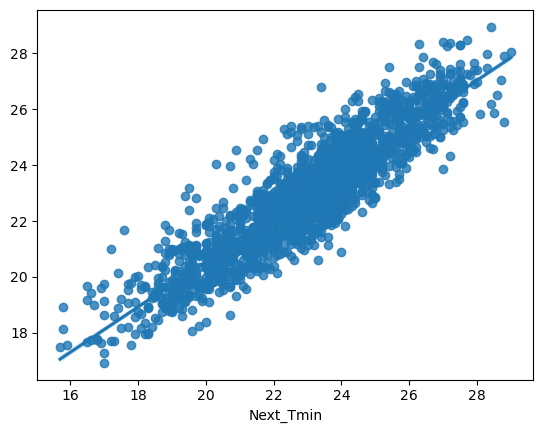

In [122]:
### Plotting to check relation betweeen y_test and y_pred
sns.regplot(x=y_test, y= pred)

### Observations:
It showing same result what we have observed above.

In [123]:
### Saving the final Regression model for Target variable 2  (Next_Tmin)
pickle.dump(Final_Model_2, open('Temperature Forecast_Next_Tmin','wb'))

### Observations:
- Can see Final Model has been saved with the help of Pickle method.

In [125]:
## Do the prediction
loaded_model = pickle.load(open('Temperature Forecast_Next_Tmin','rb'))
predicted = loaded_model.predict(x_test)
original = np.array(y_test)
dfreg2_new = pd.DataFrame()
dfreg2_new['Predicted'] = predicted
dfreg2_new['Original'] = original
print("R2 Score:  ", r2_score(y_test, predicted)*100)

R2 Score:   81.97861713949519


### Observations:
- After loading the model, can see R2 score is 81.97% like mentioned above.

### Final note:
- After loading the model, can see R2 score score as 81.97% like mentioned above.
- We have finally created following two models for their respective problems:
   - Prediction of Next_Tmax by Ridge model (R2 score of test as 77.68%)
   - Predication of Next_Tmin by Ridge model (R2 score of test as 81.97%)